# Problem 4


In [23]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [56]:
import pandas as pd

def read_and_merge_data(event_path, lob_path):
    events = pd.read_csv(event_path, header=None, names=['timestamp', 'type', 'order_id', 'size', 'price', 'direction']).set_index('timestamp')
    lob = pd.read_csv(lob_path, header=None, names=['ask_price', 'ask_size','bid_price', 'bid_size' ]).set_index(events.index)
    merged_data = pd.concat([lob, events], axis=1).groupby('timestamp').first()
    return merged_data

# Dictionary to hold the stock symbols and their corresponding paths
stock_data_paths = {
    'AMAZON': ('./AMAZON/events.csv', './AMAZON/LOB.csv'),
    'APPLE': ('./APPLE/events.csv', './APPLE/LOB.csv'),
    'GOOGLE': ('./GOOGLE/events.csv', './GOOGLE/LOB.csv'),
    'INTEL': ('./INTEL/events.csv', './INTEL/LOB.csv'),
    'MSFT': ('./MSFT/events.csv', './MSFT/LOB.csv')
}

# Dictionary to hold the merged data for each stock symbol
merged_data_dict = {}

for stock, (event_path, lob_path) in stock_data_paths.items():
    merged_data_dict[stock.lower()] = read_and_merge_data(event_path, lob_path)

In [58]:
merged_data_dict['amazon'].head()

,ask_price,ask_size,bid_price,bid_size,type,order_id,size,price,direction
timestamp,,,,,,,,,
1970-01-01 00:00:00.000000000,2239500,100,2231800,100,5,0,1,2238200,-1
1970-01-01 00:00:00.172148052,2239500,100,2238100,21,1,11885113,21,2238100,1
1970-01-01 00:00:00.172766858,2239500,100,2237500,100,4,11885113,21,2238100,1
1970-01-01 00:00:00.355320054,2239500,100,2237500,74,5,0,100,2238400,-1
1970-01-01 00:00:00.358211587,2239500,100,2237500,74,5,0,100,2238400,-1


In [57]:
"""for stock, merged_data in merged_data_dict.items():
    merged_data.index = merged_data.index - merged_data.index[0]
    merged_data.index = pd.to_datetime(merged_data.index, unit='s')"""

In [59]:

for stock, merged_data in merged_data_dict.items():
    merged_data['midprice']= (merged_data['bid_price'] + merged_data['ask_price'])/2
    merged_data['spread'] = merged_data['ask_price'] - merged_data['bid_price']
    mask = (merged_data['type'] == 4) | (merged_data['type'] == 5)
    merged_data['cumul_executed'] = merged_data[mask]['size'].cumsum()
    merged_data['cumul_executed'].fillna(method = 'ffill', inplace = True)
    merged_data['cumul_executed'].fillna(0, inplace = True)


## a)

### Midprice using tick time

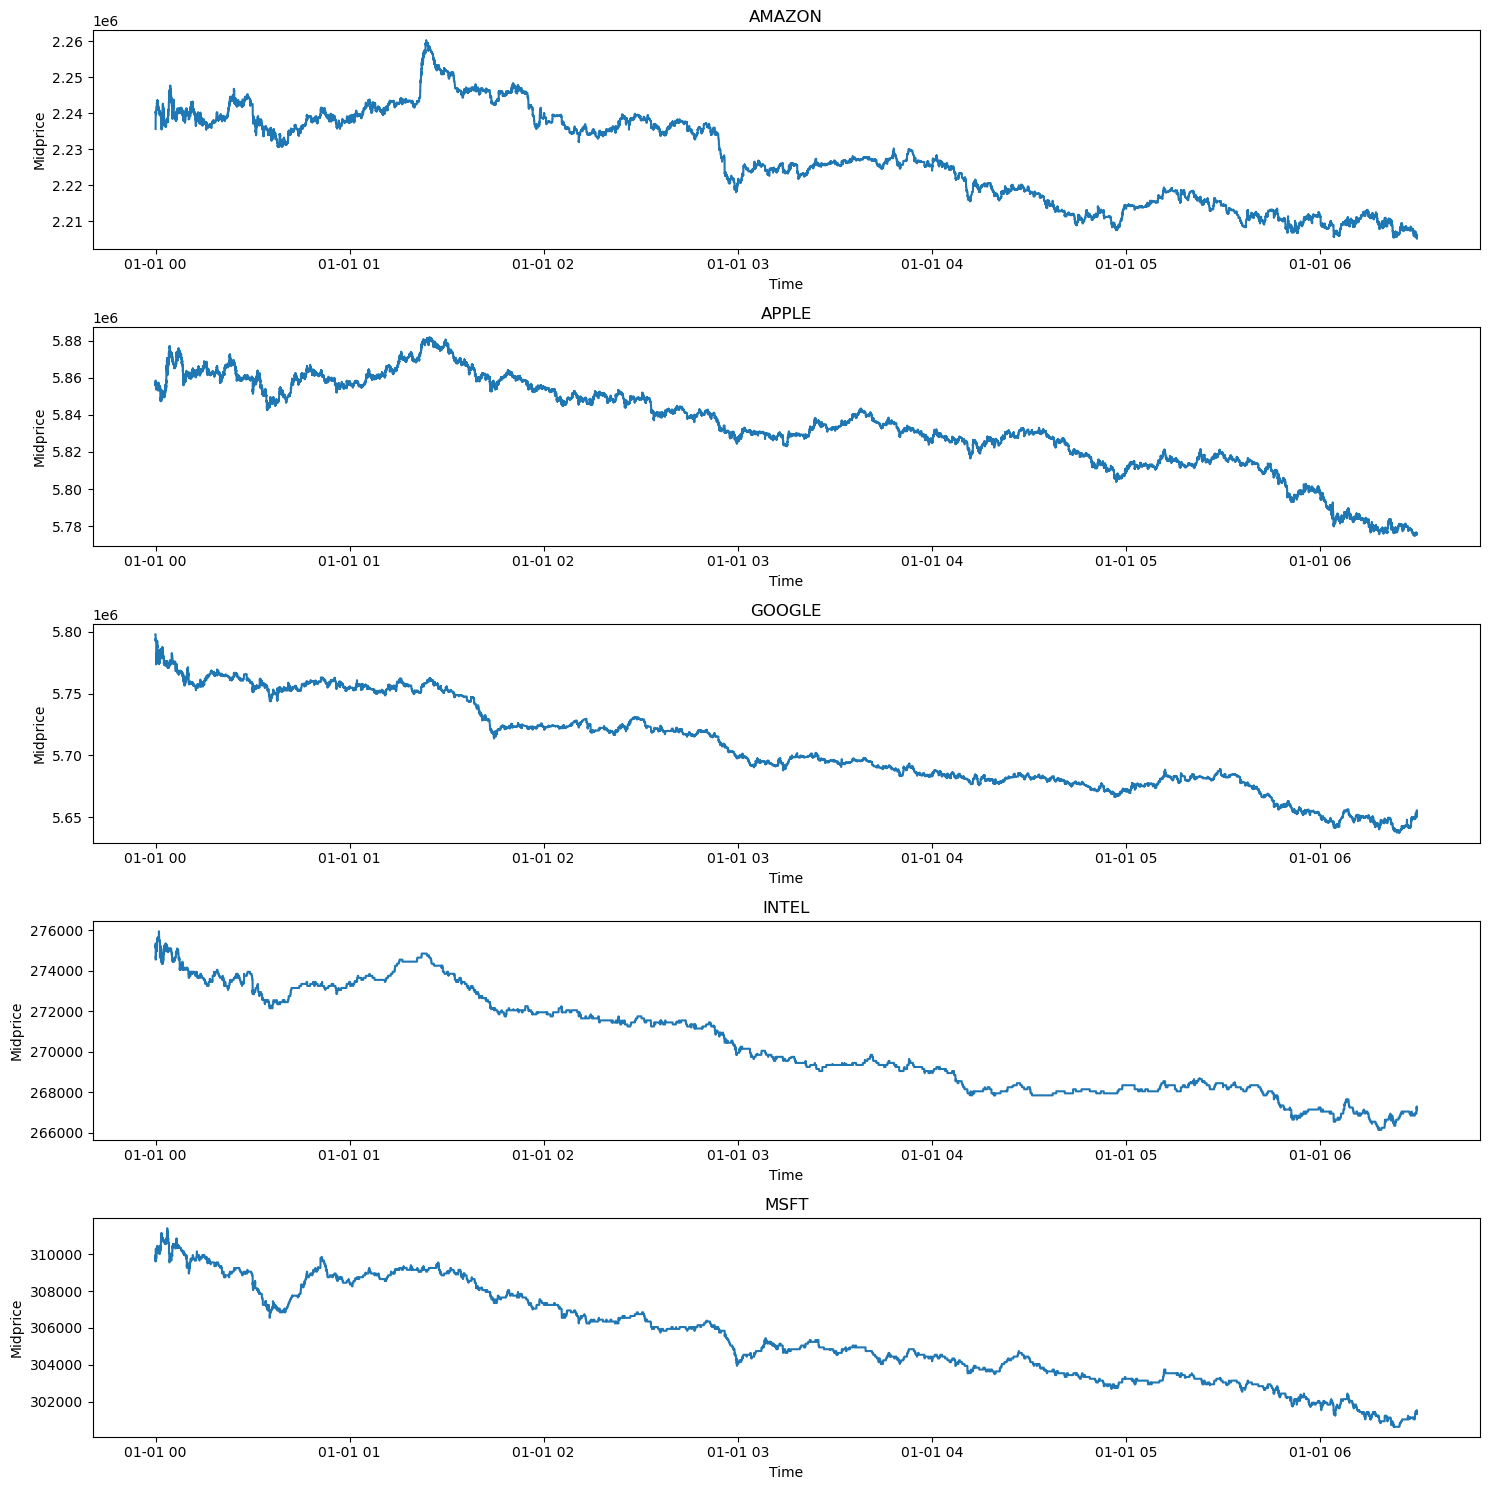

In [60]:
# Plotting the midprice for each stock as a function of time

fig, axs = plt.subplots(5, 1, figsize=(15, 15))

for i, (stock, merged_data) in enumerate(merged_data_dict.items()):
    axs[i].plot(merged_data.index, merged_data['midprice'])
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Midprice')

plt.tight_layout()
plt.show()


### Midprice using 1 minute interval

In [66]:
# Resampling the data to 1 minute intervals
resampled_data_dict = {}
for stock, merged_data in merged_data_dict.items():
    resampled_data_dict[stock] = merged_data.resample('1Min').first()

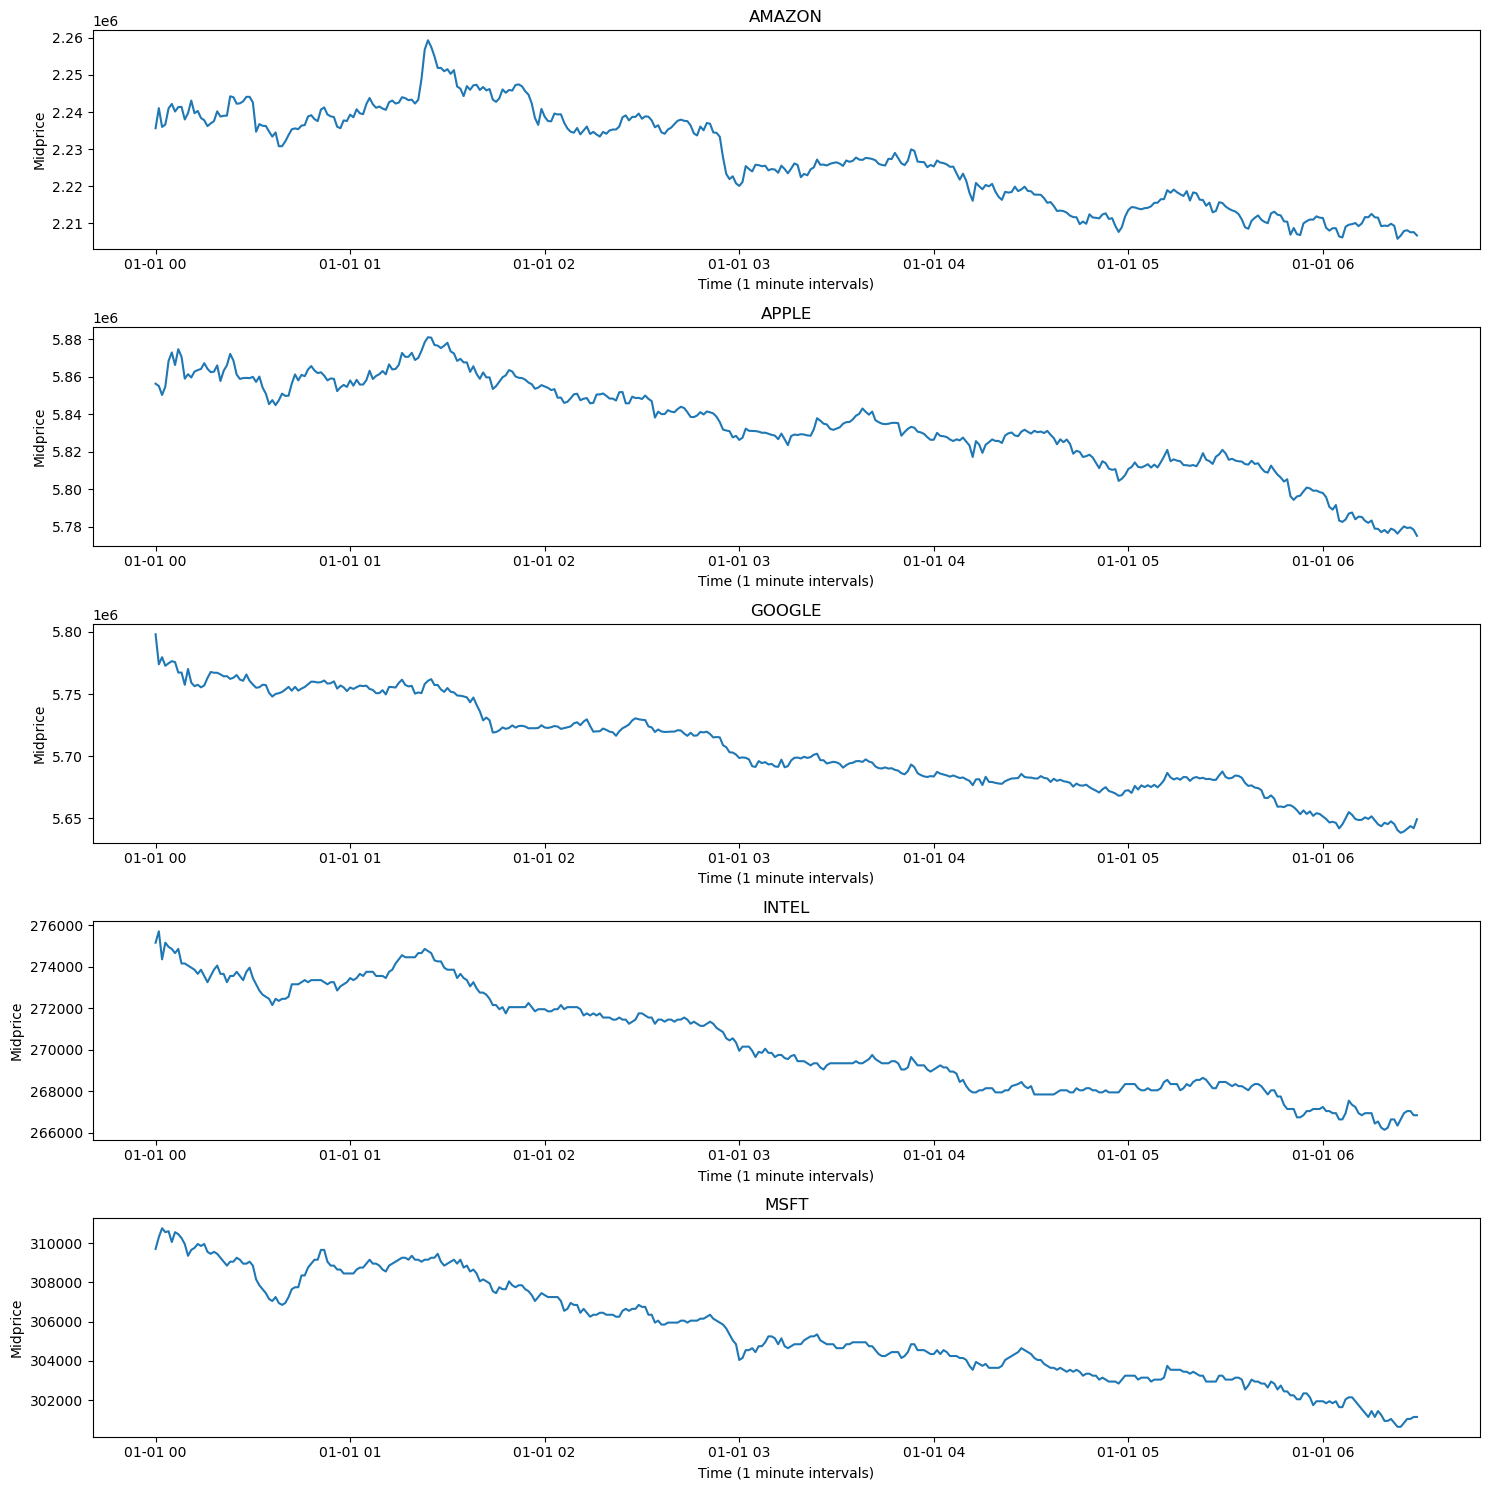

In [67]:
#Plotting the resampled midprice for each stock as a function of time
fig, axs = plt.subplots(5,1, figsize=(15,15))

for i, (stock, resampled_data) in enumerate(resampled_data_dict.items()):
    axs[i].plot(resampled_data.index, resampled_data['midprice'])
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Time (1 minute intervals)')
    axs[i].set_ylabel('Midprice')

plt.tight_layout()
plt.show()

## b)

### For tick time

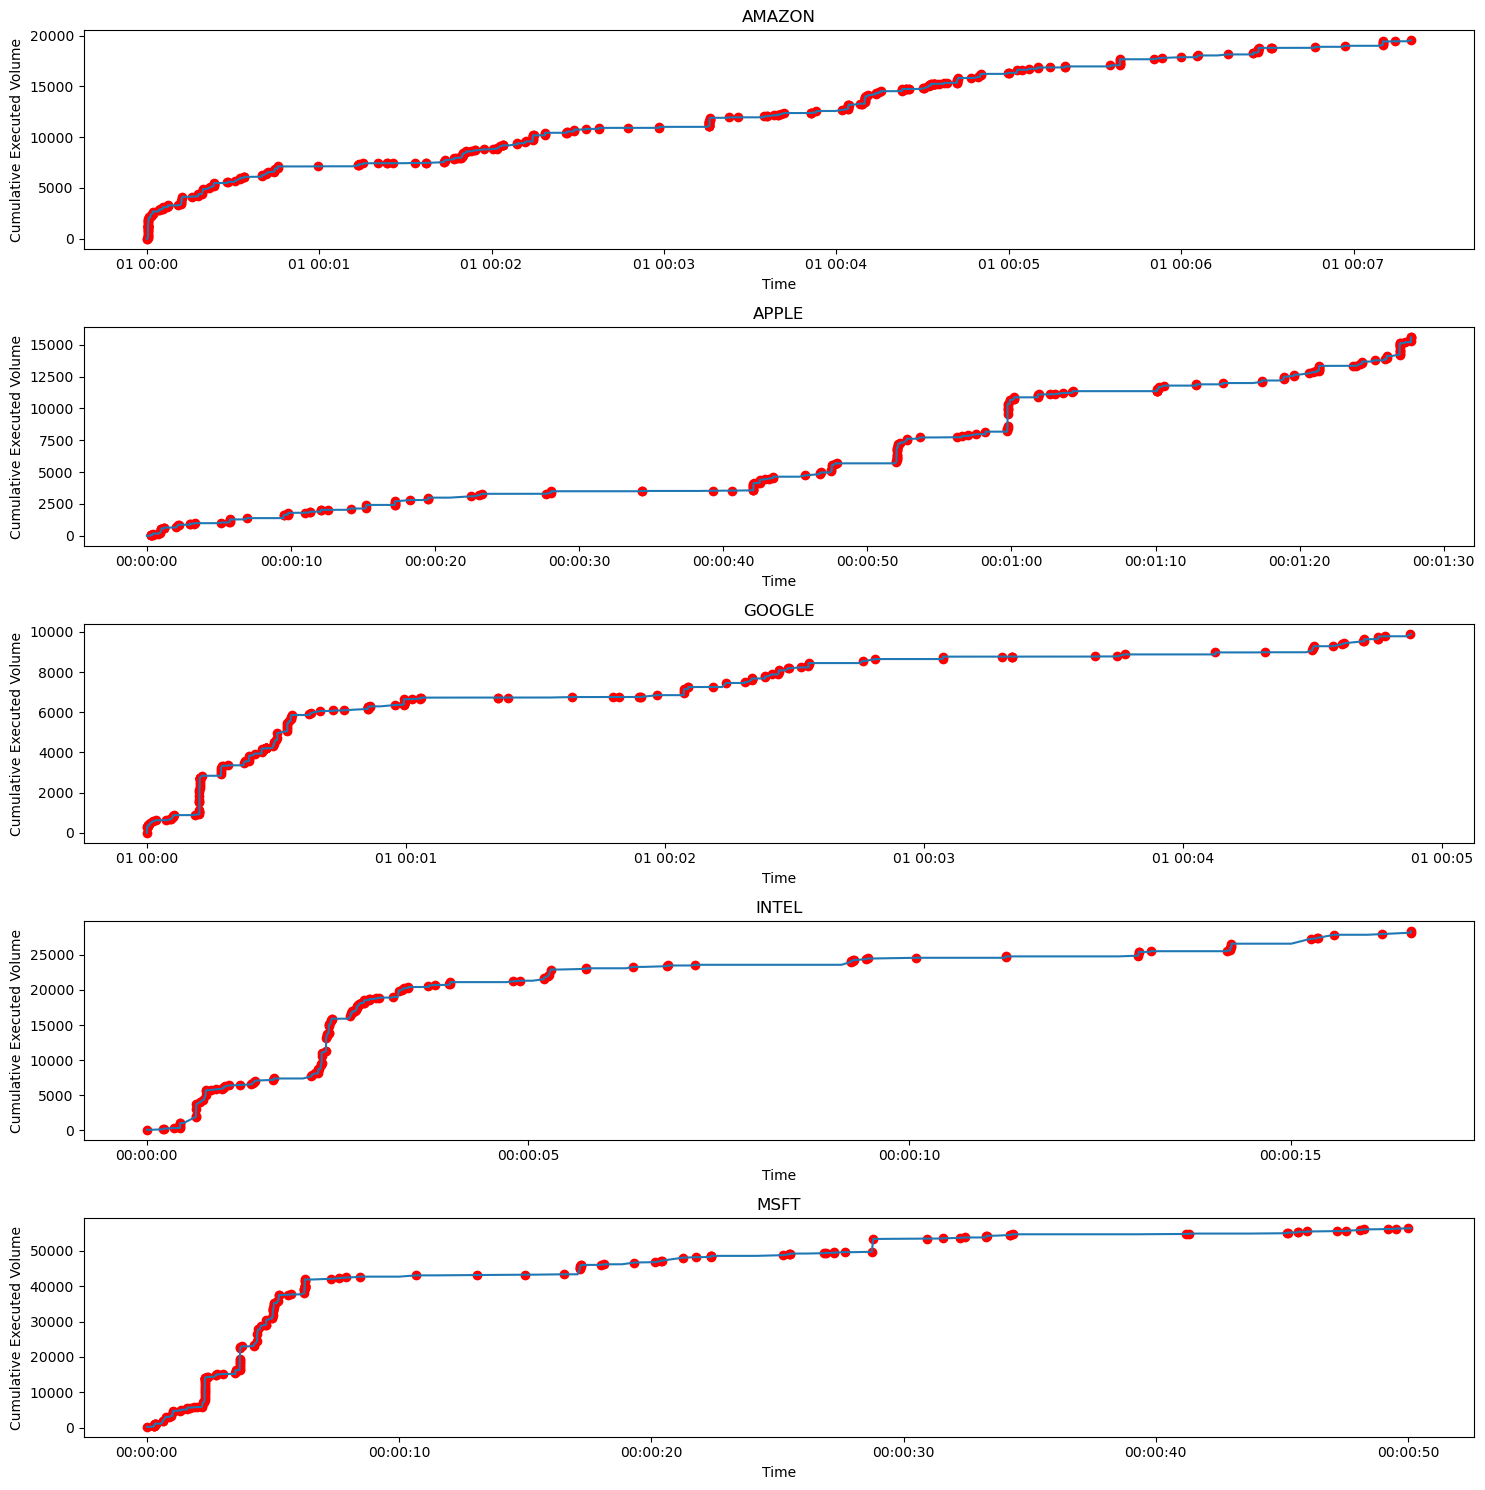

In [62]:
# plotting cumulative executed volume

fig, axs = plt.subplots(5,1, figsize=(15,15))

for i, (stock, merged_data) in enumerate(merged_data_dict.items()):
    sample_to_use = merged_data[:1000]
    axs[i].plot(sample_to_use.index, sample_to_use['cumul_executed'])
    mask = (sample_to_use['type'] == 4) | (sample_to_use['type'] == 5)
    trade_points = sample_to_use[mask]['cumul_executed']
    axs[i].scatter(trade_points.index, trade_points, color='red')
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Cumulative Executed Volume')
    
plt.tight_layout()
plt.show()





### Now Sampled very minutes

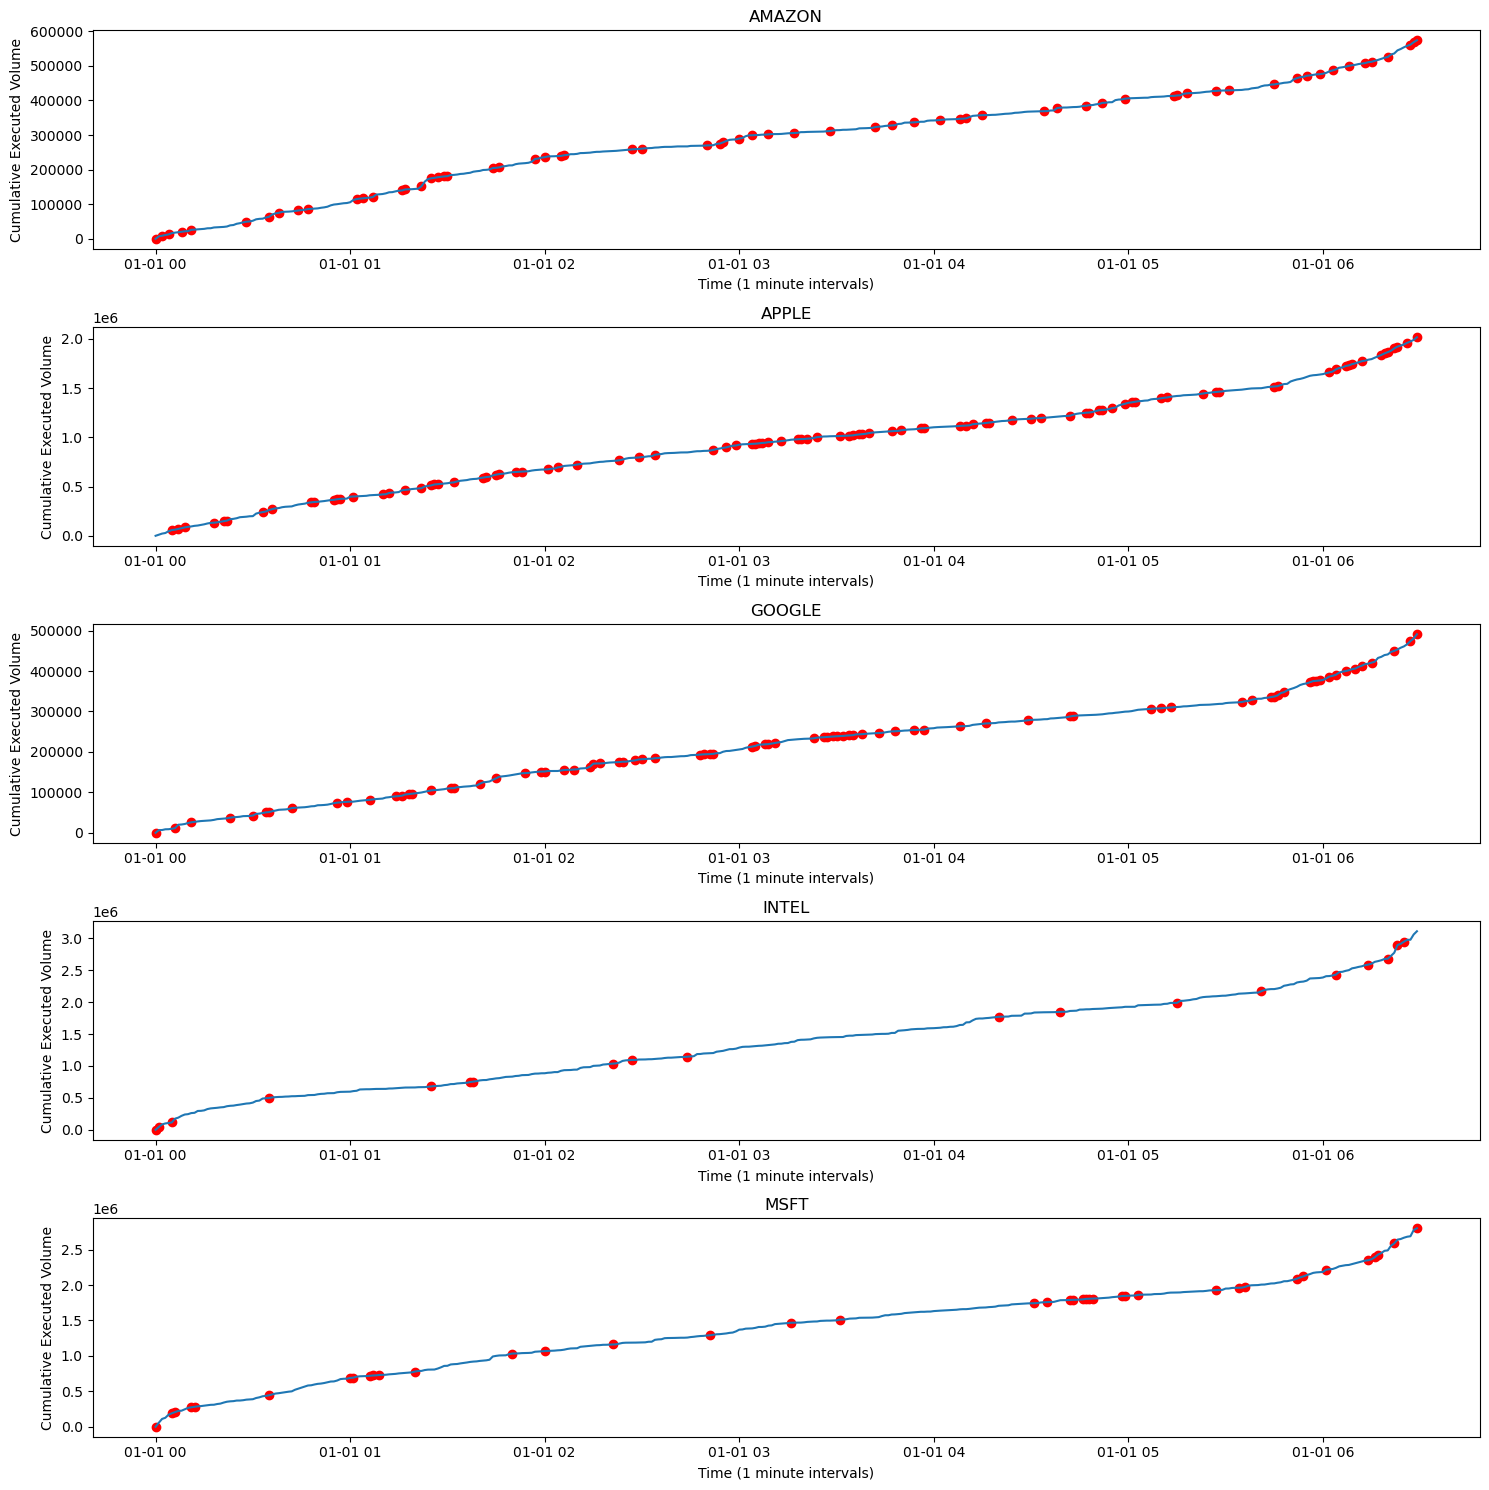

In [63]:
# Plotting the resampled cumulative executed volume for each stock as a function of time


# Of course, now that we have resampled the data, we cannot spot all the individual trades.
# However, we can still see the cumulative executed volume at each minute interval.

fig, axs = plt.subplots(5,1, figsize=(15,15))
for i, (stock, resampled_data) in enumerate(resampled_data_dict.items()):

    sample_to_use = resampled_data[:1000]
    axs[i].plot(sample_to_use.index, sample_to_use['cumul_executed'])
    mask = (sample_to_use['type'] == 4) | (sample_to_use['type'] == 5)
    trade_points = sample_to_use[mask]['cumul_executed']
    axs[i].scatter(trade_points.index, trade_points, color='red')
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Time (1 minute intervals)')
    axs[i].set_ylabel('Cumulative Executed Volume')

plt.tight_layout()
plt.show()

### C)

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(15,5))

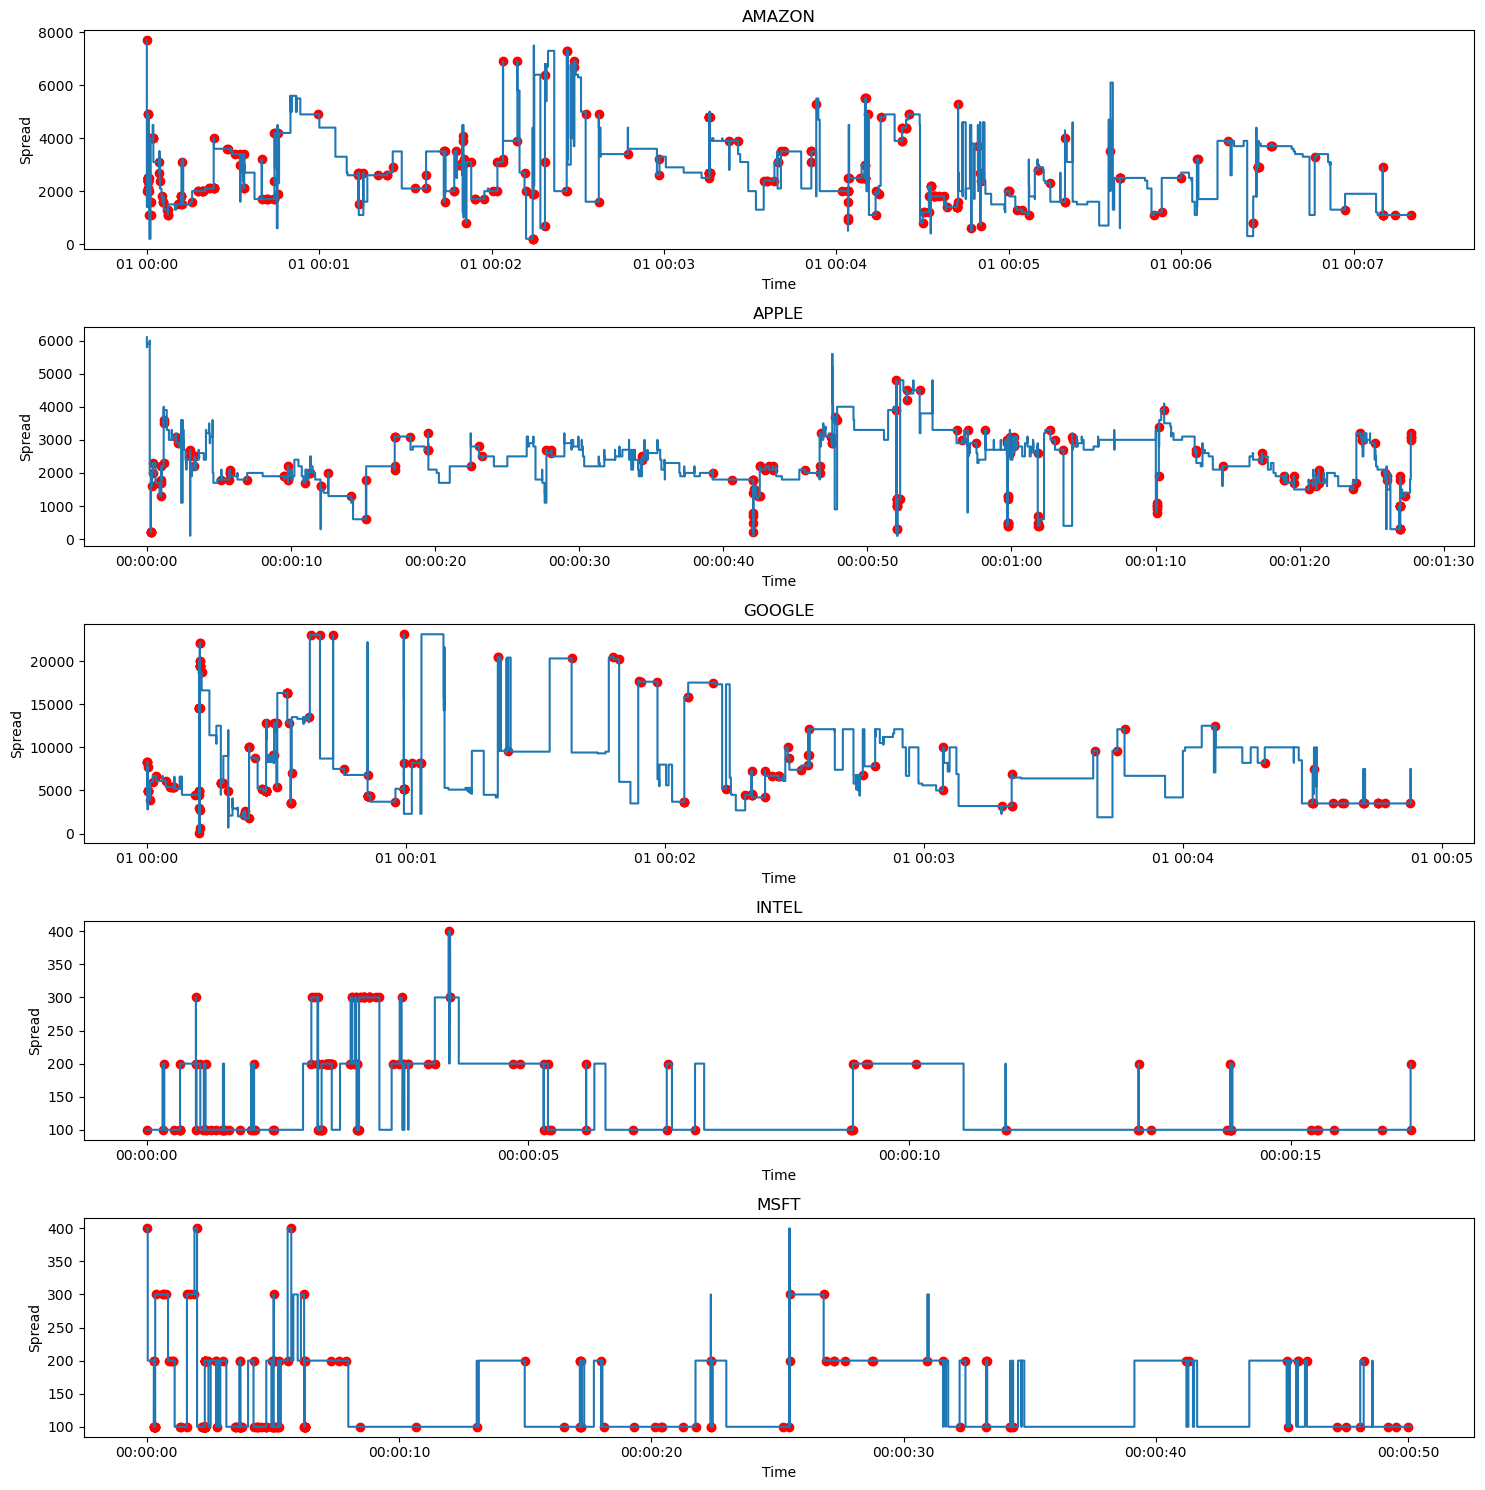

In [64]:
## Plotting the spread as a function of time


fig, axs = plt.subplots(5,1, figsize=(15,15))
for i, (stock, merged_data) in enumerate(merged_data_dict.items()):
    sample_to_use = merged_data[:1000]
    axs[i].plot(sample_to_use.index, sample_to_use['spread'], drawstyle='steps-pre')
    mask = (sample_to_use['type'] == 4) | (sample_to_use['type'] == 5)
    trade_points = sample_to_use[mask]['spread']
    axs[i].scatter(trade_points.index, trade_points, color='red')
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Spread')

plt.tight_layout()
plt.show()

### Now every minutes

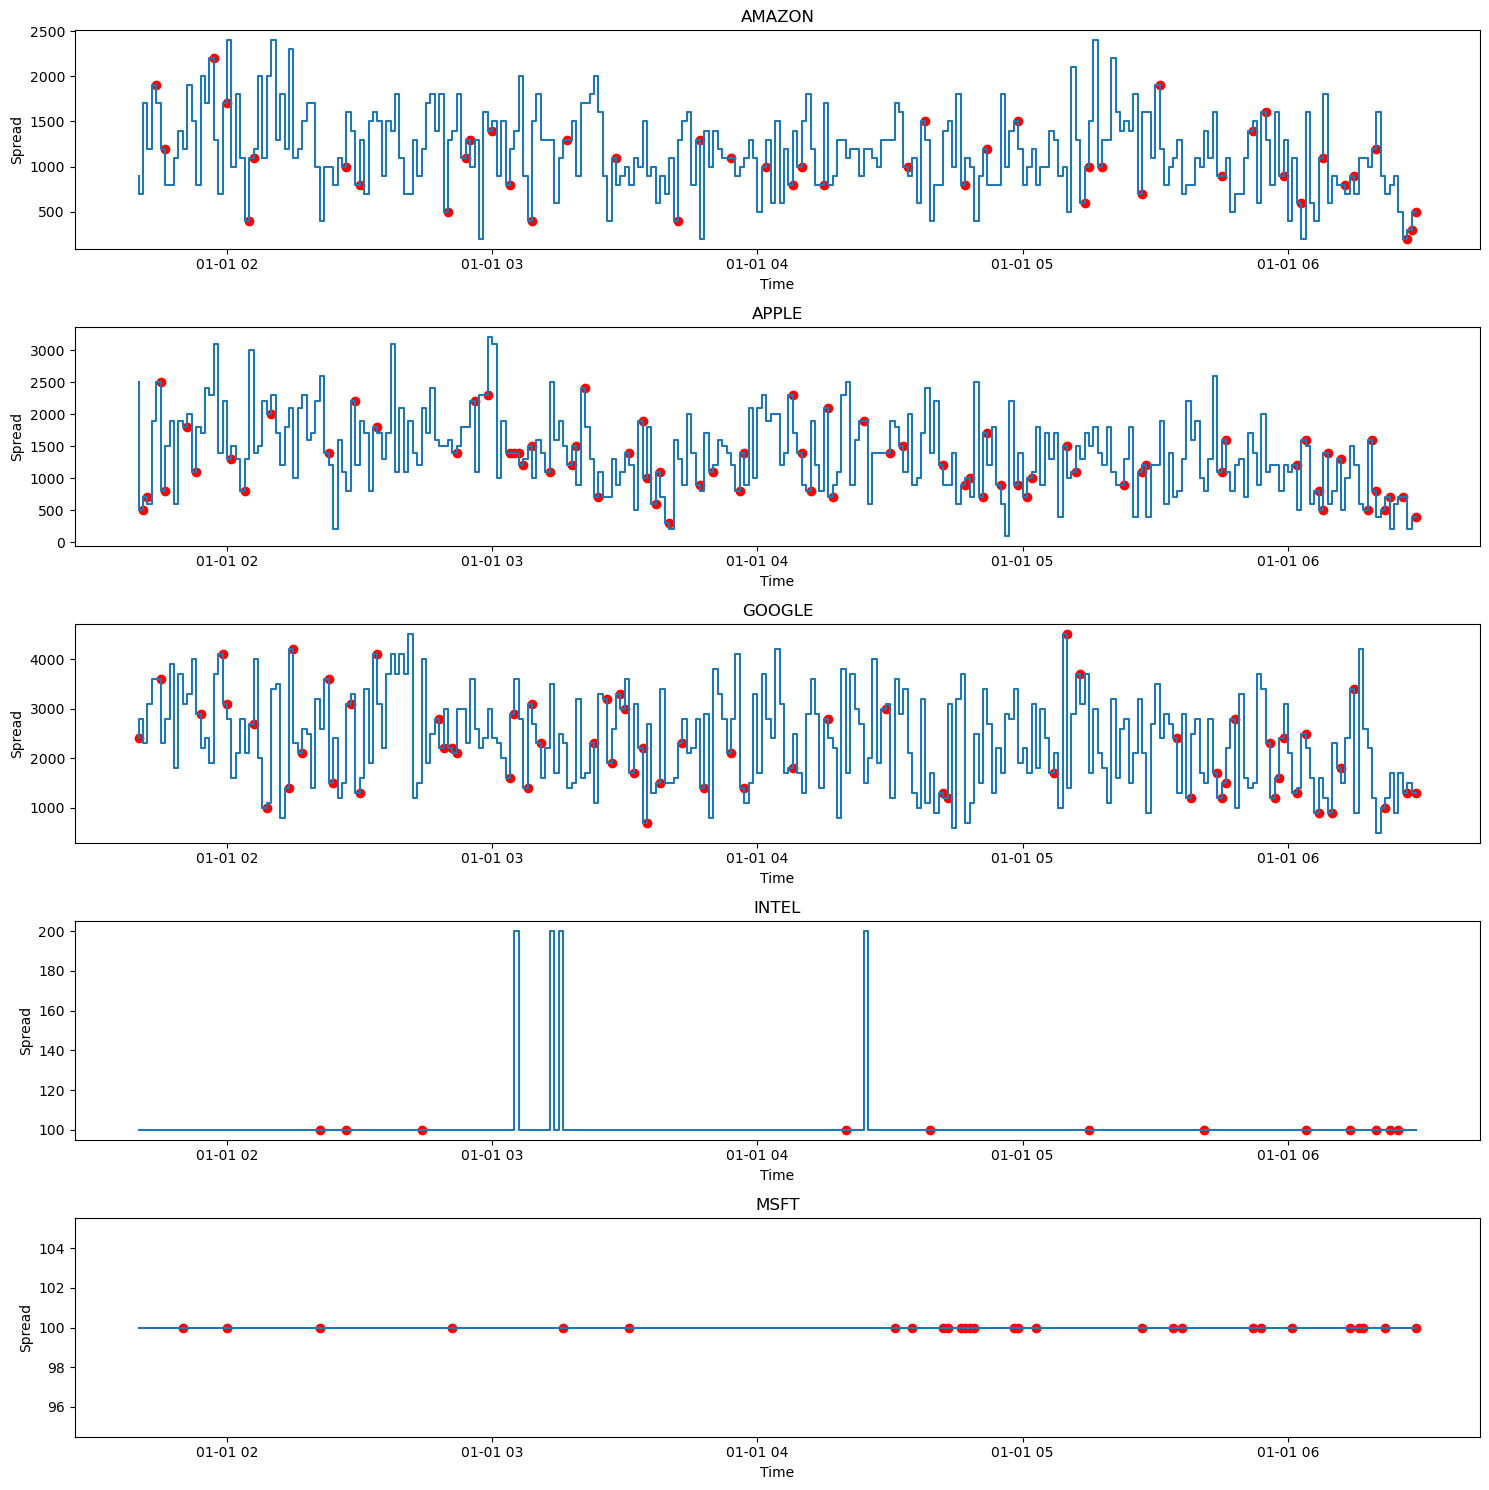

In [120]:
# Of course, once again the data is sampled, so we cannot see all the individual trades.    

fig, axs = plt.subplots(5,1, figsize=(15,15))
for i, (stock, merged_data) in enumerate(resampled_data_dict.items()):
    sample_to_use = merged_data[100:1000]
    axs[i].plot(sample_to_use.index, sample_to_use['spread'], drawstyle='steps-pre')
    mask = (sample_to_use['type'] == 4) | (sample_to_use['type'] == 5)
    trade_points = sample_to_use[mask]['spread']
    axs[i].scatter(trade_points.index, trade_points, color='red')
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Spread')

plt.tight_layout()
plt.show()

## d) Plot 10-sec and 1-min midprice returns and their distribution histograms. For these quantities, plot distribution of linear autocorrelations of lag 1 and 5

### 10s midprice returns

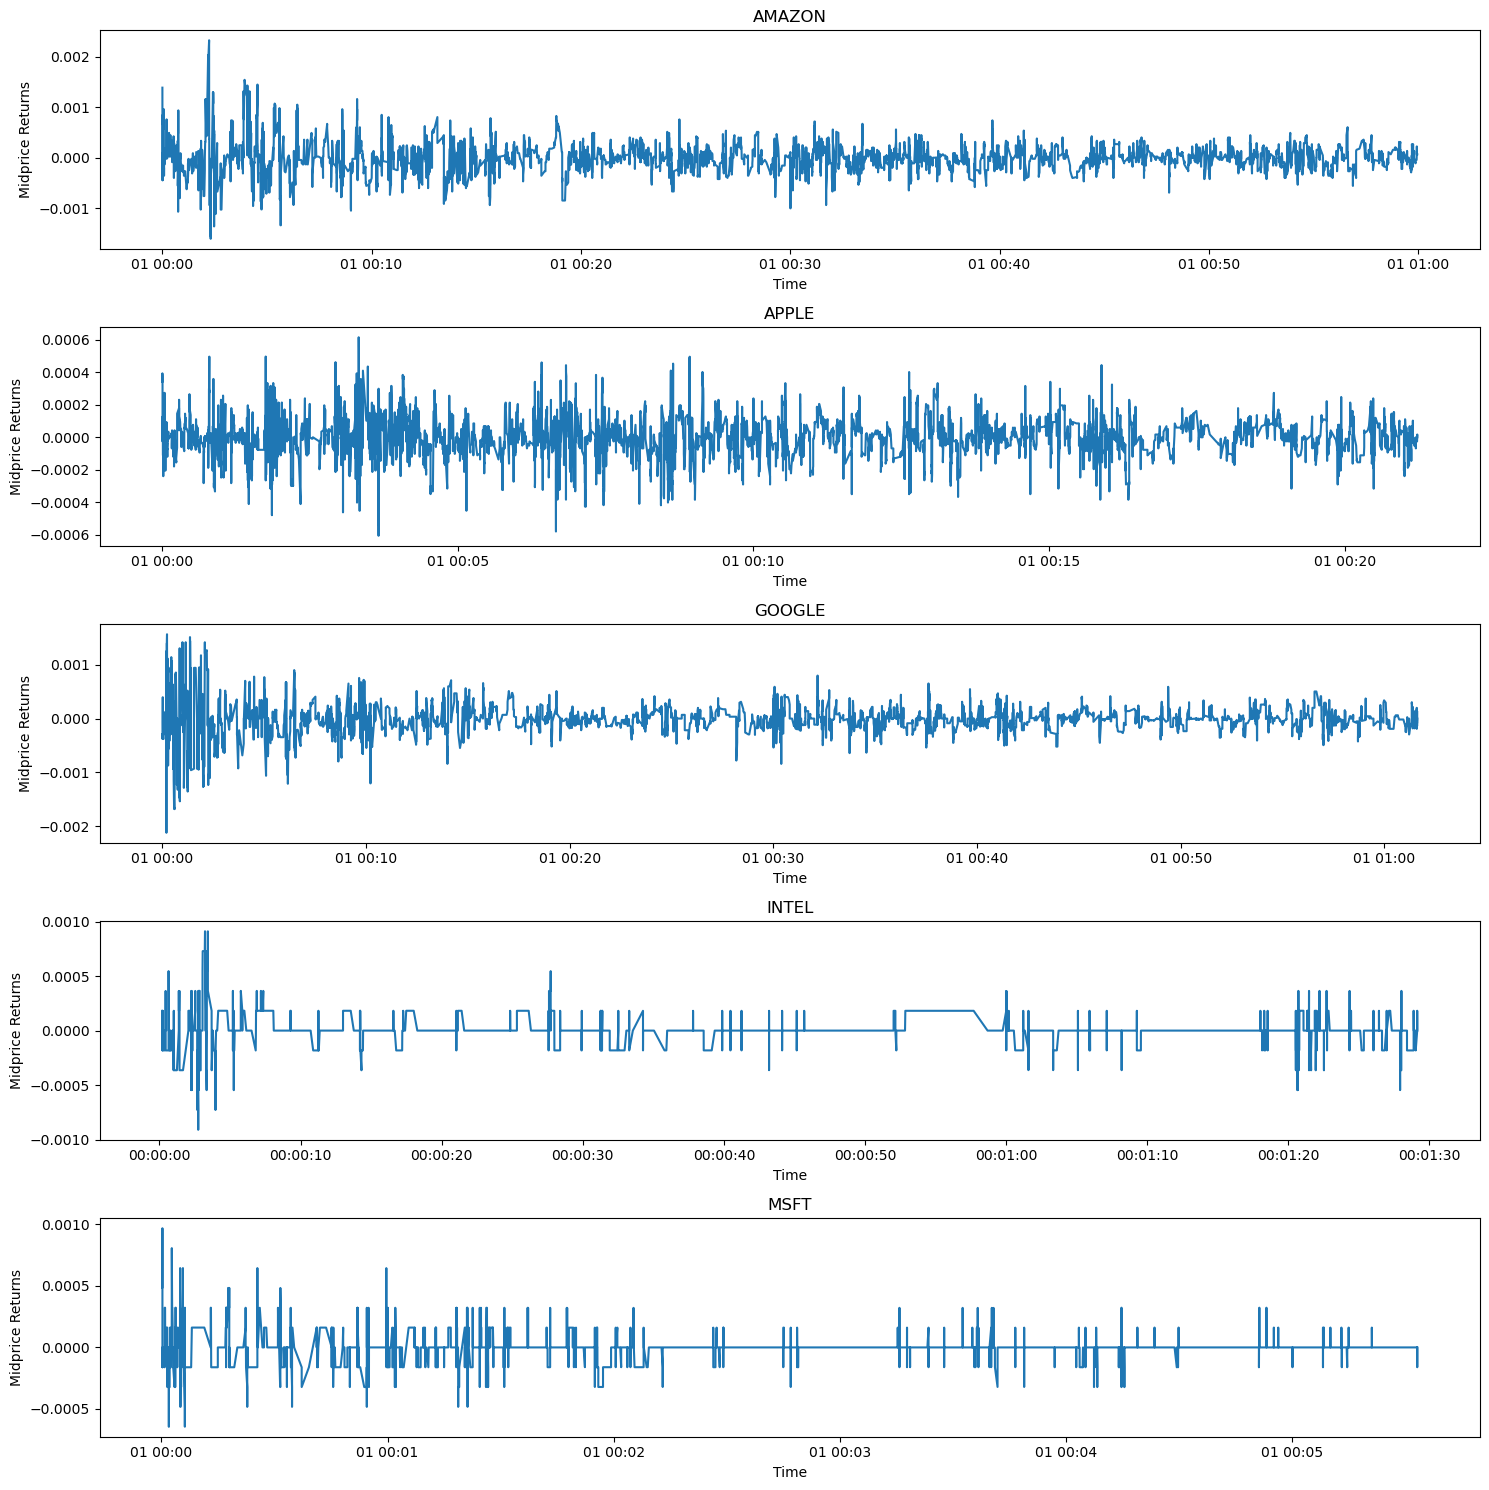

In [76]:
#plotting 10-sec midprice returns

fig, axs = plt.subplots(5,1, figsize=(15,15))

resampled_data_10s_dict = {}
for i, (stock, merged_data) in enumerate(merged_data_dict.items()):
    resampled_data = merged_data.resample('10S').first()
    resampled_data['10s_return'] = resampled_data['midprice'].pct_change(1)
    resampled_data_10s_dict[stock] = resampled_data
    sample_to_use = merged_data[:10000]
    axs[i].plot(sample_to_use.index, sample_to_use['10s_return'])
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Midprice Returns')

plt.tight_layout()
plt.show()



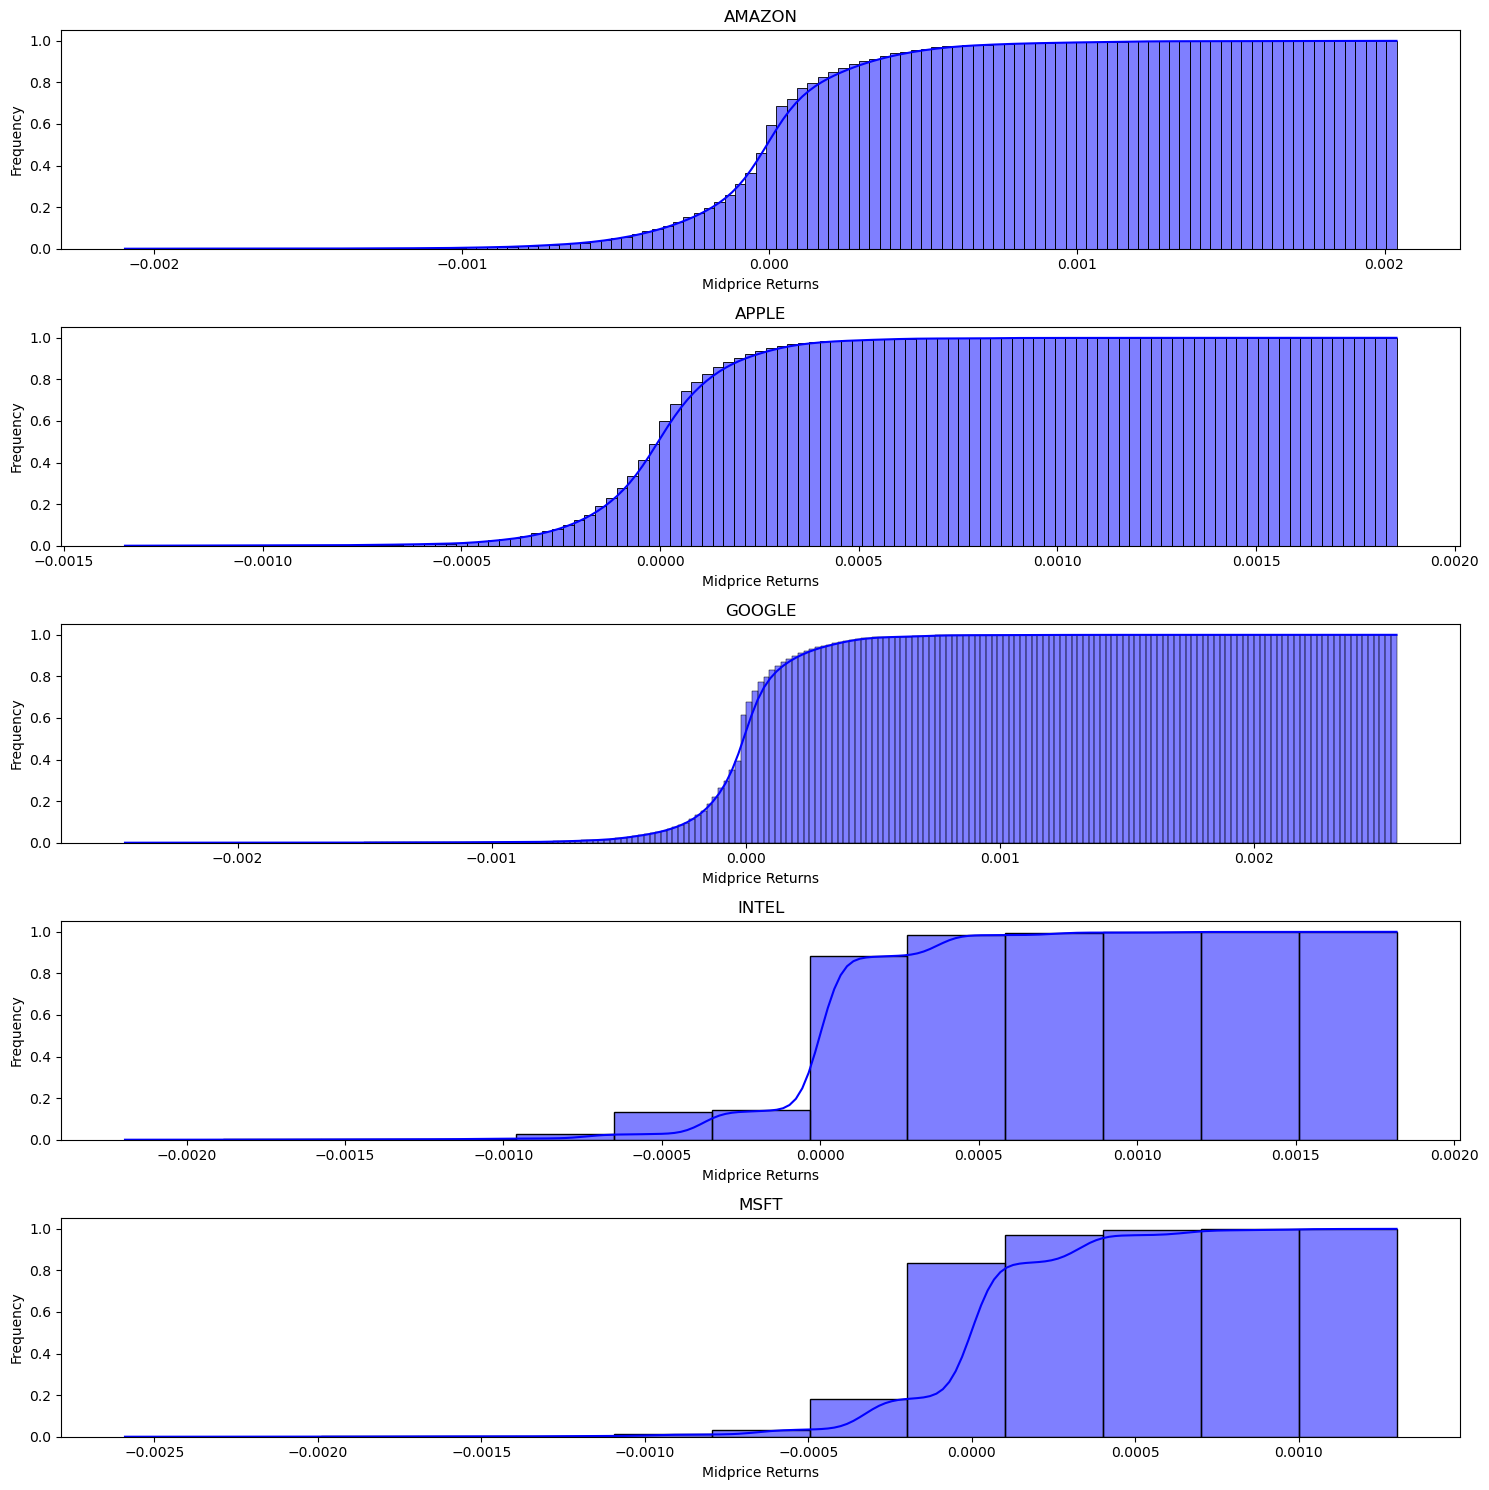

In [94]:
#Plotting the cumulative distributions of midprice returns for each stock

fig, axs = plt.subplots(5,1, figsize=(15,15))
for i, (stock, resampled_data) in enumerate(resampled_data_10s_dict.items()):
    sns.histplot(resampled_data['10s_return'], ax=axs[i], stat='density', kde=True, color='blue', cumulative=True)
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Midprice Returns')
    axs[i].set_ylabel('Frequency')
    
    
plt.tight_layout()
plt.show()

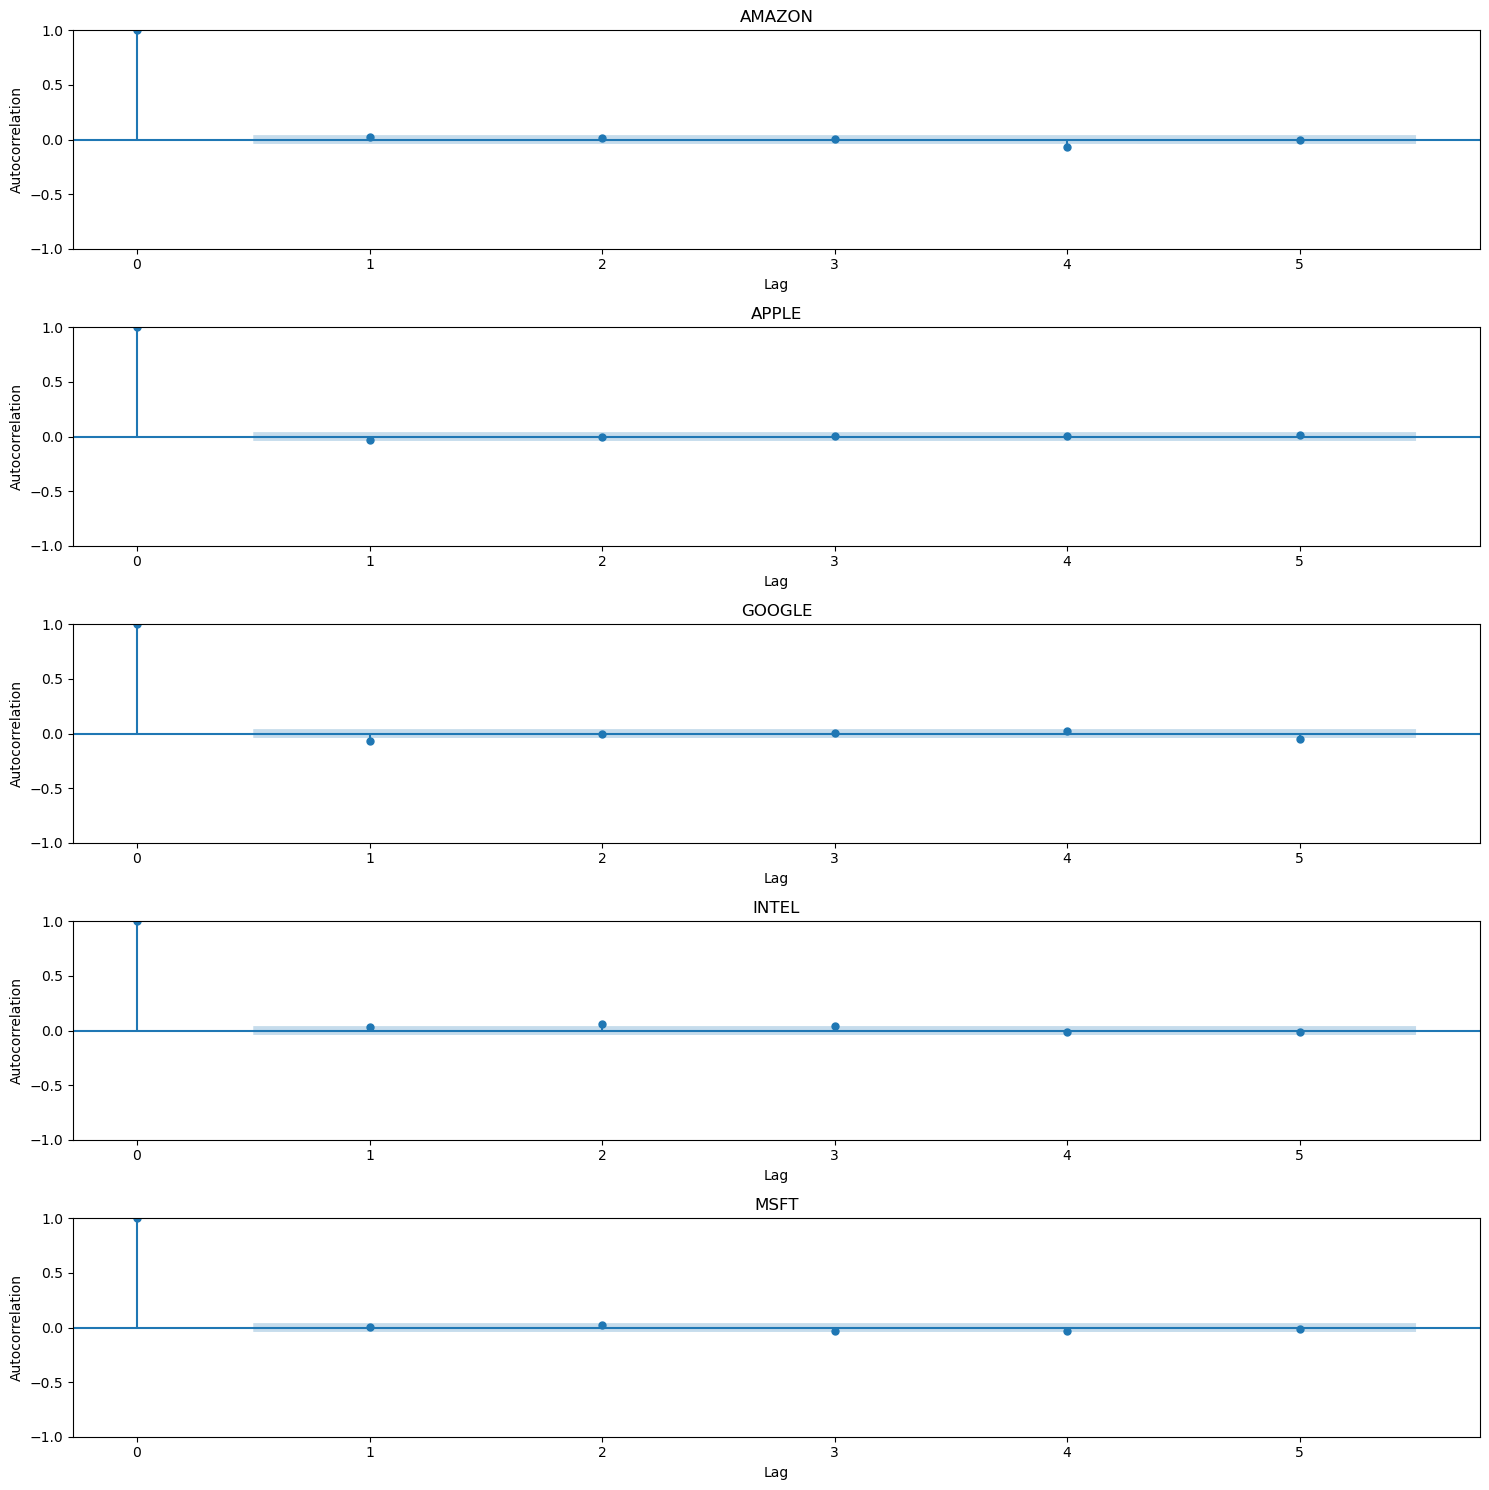

In [114]:
# Plotting the autocorrelation of midprice returns for each stock
import statsmodels.api as sm
fig, axs = plt.subplots(5,1, figsize=(15,15))
for i, (stock, resampled_data) in enumerate(resampled_data_10s_dict.items()):
    sm.graphics.tsa.plot_acf(resampled_data['10s_return'].dropna(), lags=5, ax=axs[i])
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Lag')
    axs[i].set_ylabel('Autocorrelation')

plt.tight_layout()
plt.show()

### 1 min midprice_returns

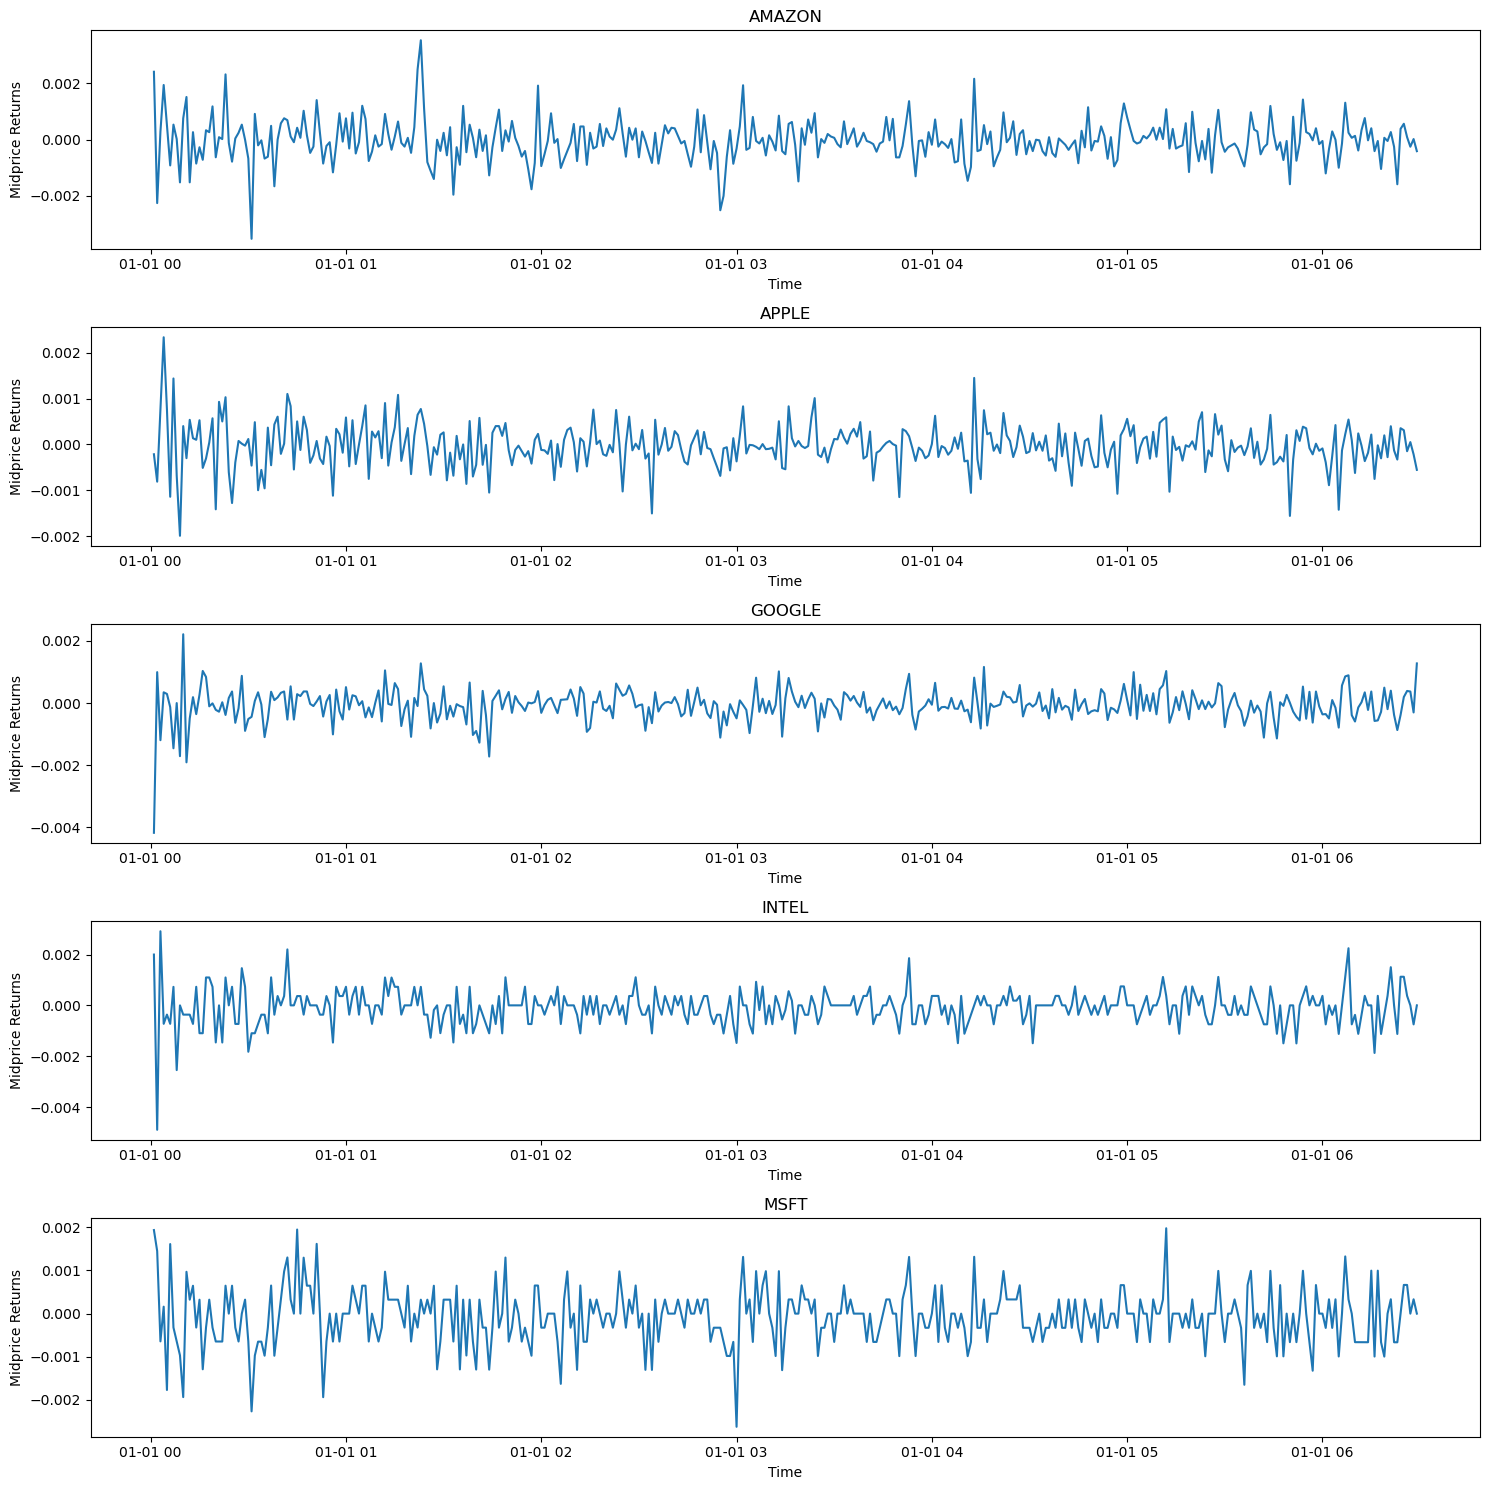

In [83]:
#Plotting one-minute midprice returns

fig, axs = plt.subplots(5,1, figsize=(15,15))
for i, (stock, data) in enumerate(resampled_data_dict.items()):
    data['1m_return'] = data['midprice'].pct_change(1)
    sample_to_use = data[:10000]
    axs[i].plot(sample_to_use.index, sample_to_use['1m_return'])
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Midprice Returns')

plt.tight_layout()
plt.show()
    

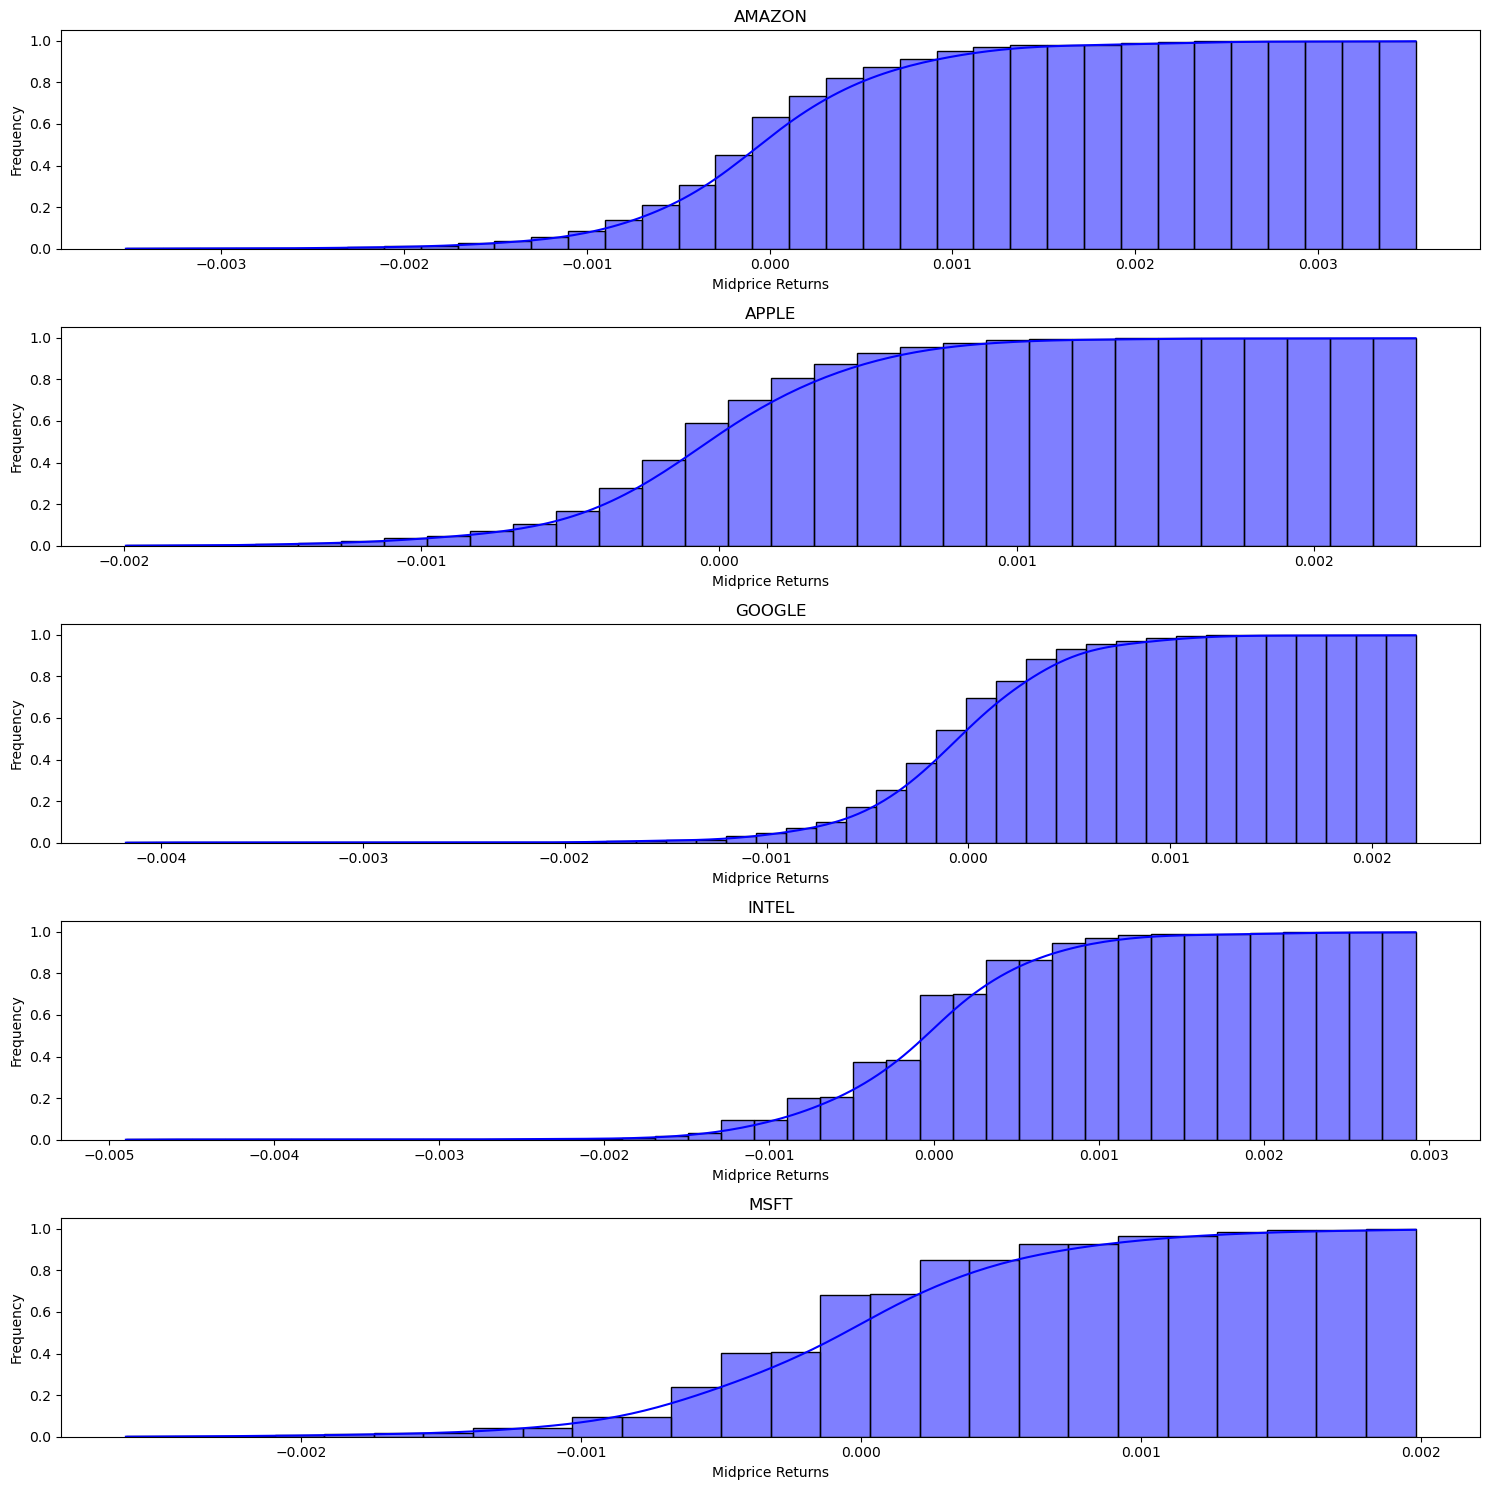

In [84]:
## Plotting the cumulative distributions of 1m midprice returns for each stock

fig, axs = plt.subplots(5,1, figsize=(15,15))
for i, (stock_name, resampled_data) in enumerate(resampled_data_dict.items()):
    sns.histplot(resampled_data['1m_return'], ax=axs[i], stat='density', kde=True, color='blue', cumulative=True)
    axs[i].set_title(stock_name.upper())
    axs[i].set_xlabel('Midprice Returns')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

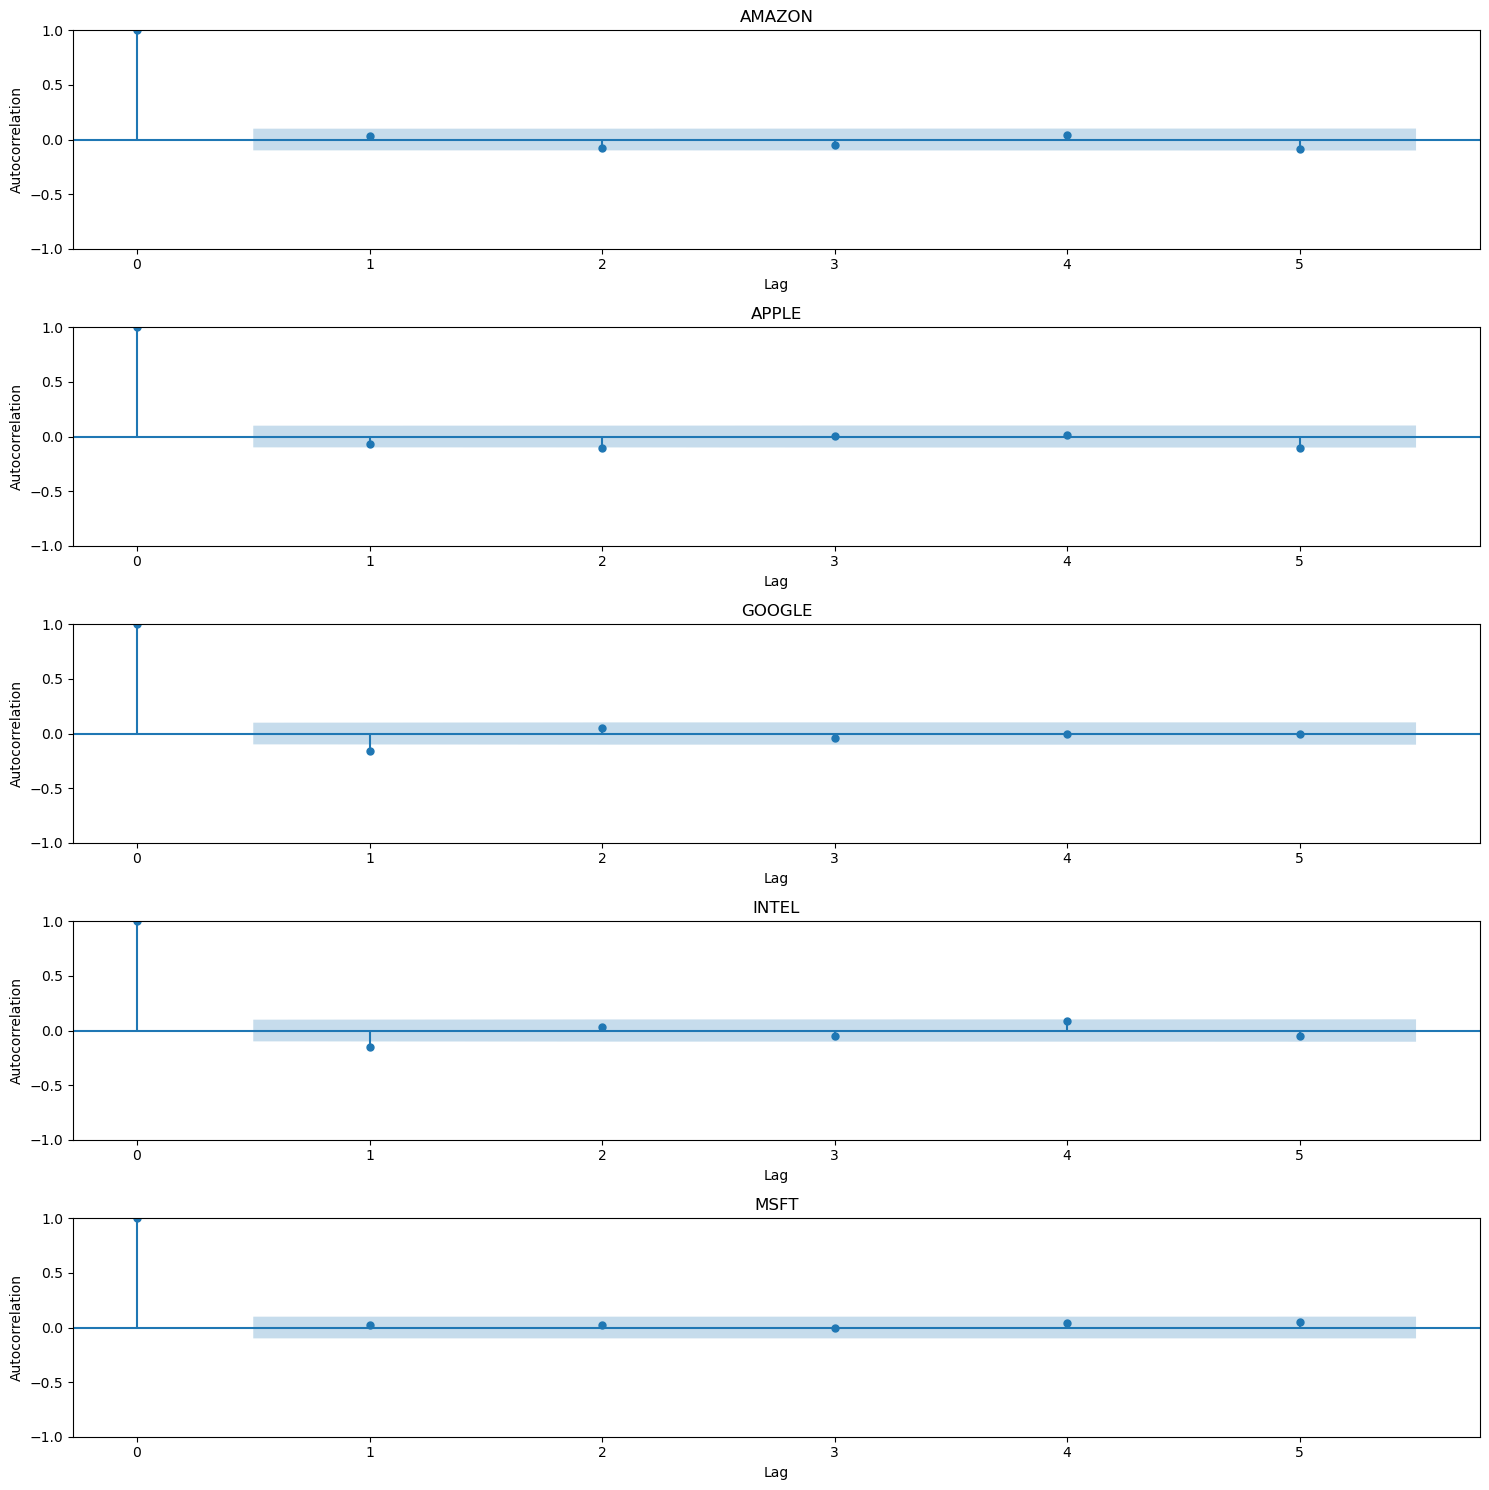

In [115]:
## Plotting the autocorrelation of 1m midprice returns for each stock

fig, axs = plt.subplots(5,1, figsize=(15,15))
for i, (stock, resampled_data) in enumerate(resampled_data_dict.items()):
    sm.graphics.tsa.plot_acf(resampled_data['1m_return'].dropna(), lags=5, ax=axs[i])
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Lag')
    axs[i].set_ylabel('Autocorrelation')

plt.tight_layout()
plt.show()

#We exhibit no correlation in returns ! 

## e)

#### Analyzing five-ticks returns

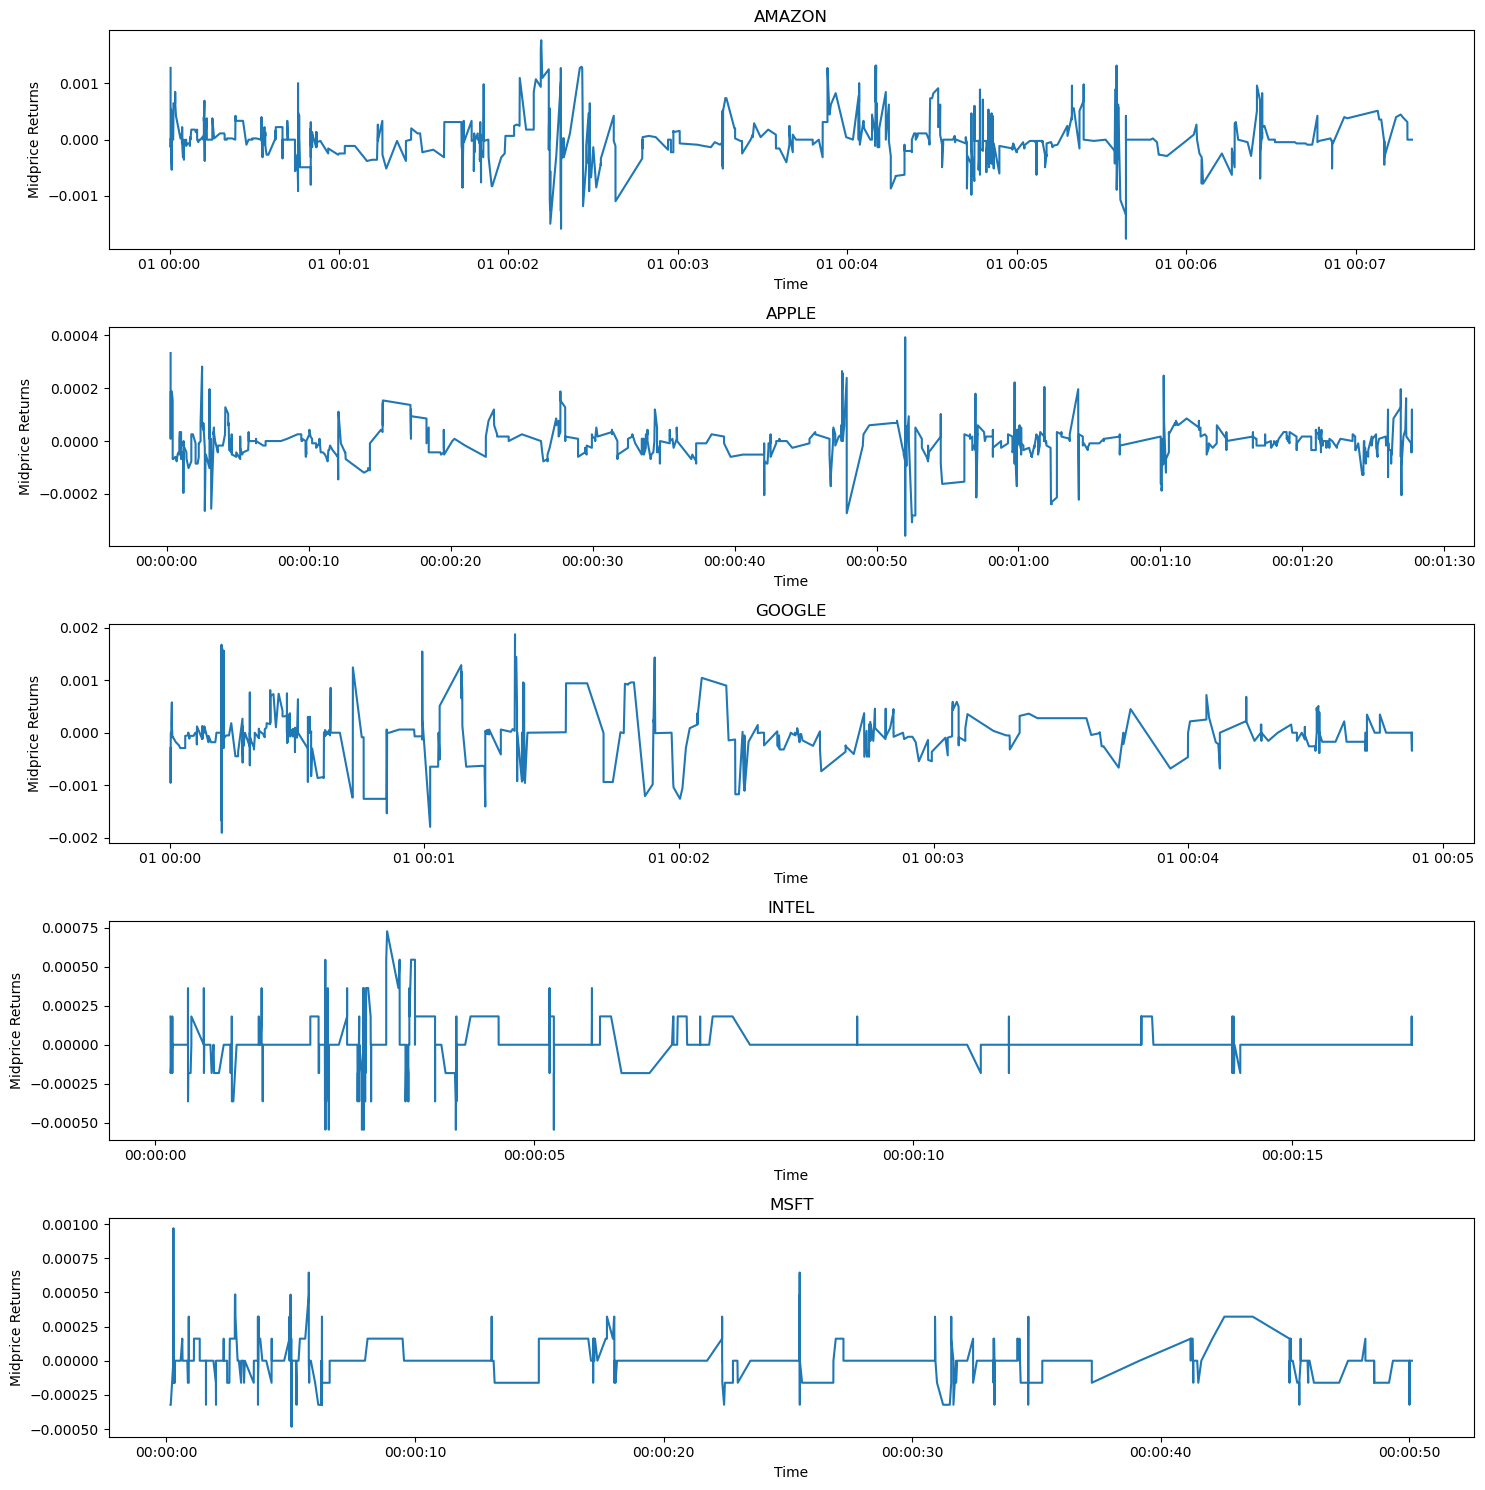

In [102]:
##Plotting five ticks returns

fig, axs = plt.subplots(5,1, figsize=(15,15))

for i, (stock, merged_data) in enumerate(merged_data_dict.items()):

    sample_to_use = merged_data[:1000]
    axs[i].plot(sample_to_use.index, sample_to_use['midprice'].pct_change(5))
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Midprice Returns')
plt.tight_layout()
plt.show()

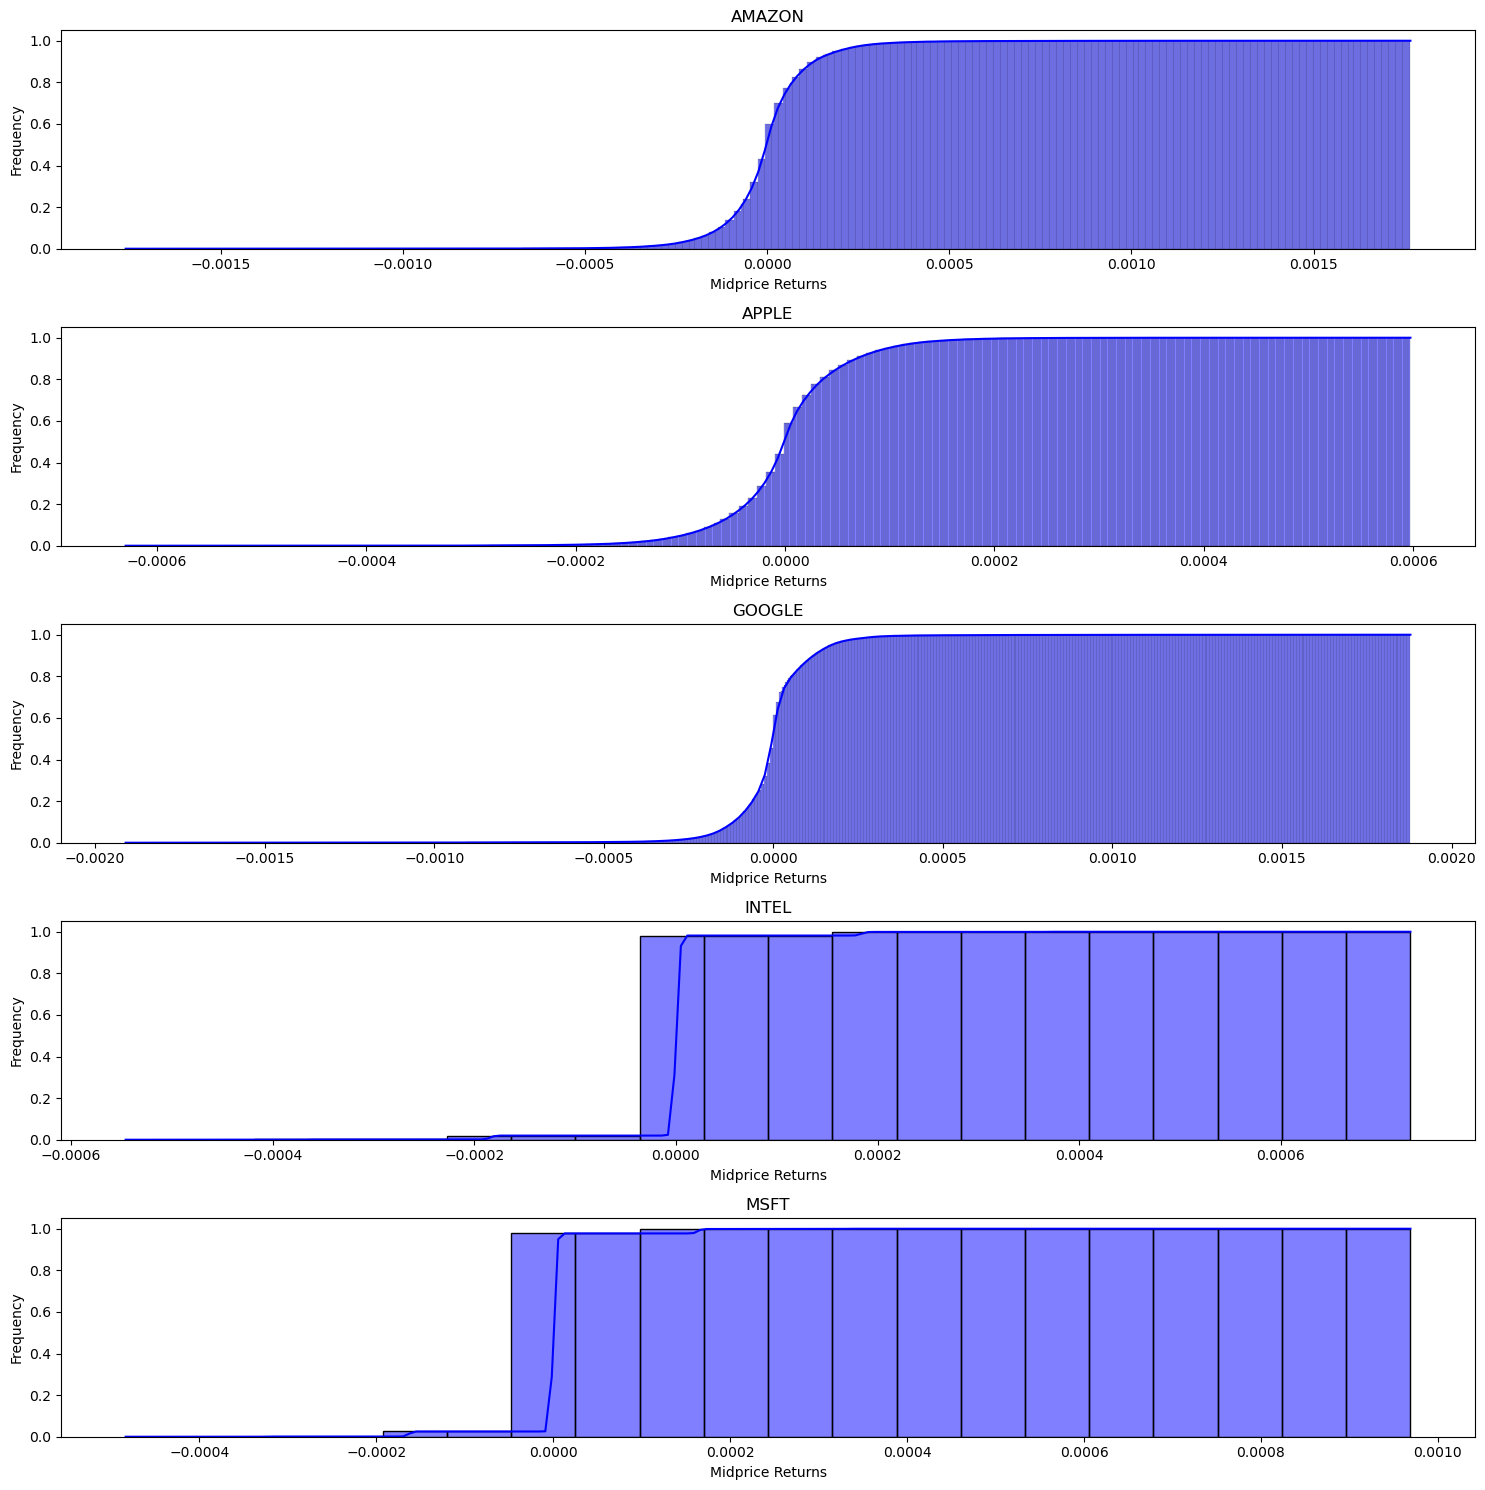

In [104]:
## Plotting returns distribution

fig, axs = plt.subplots(5, 1, figsize = (15,15))

for i, (stock , merged_data) in enumerate(merged_data_dict.items()):
    sns.histplot(merged_data['midprice'].pct_change(5), ax = axs[i], stat = 'density', kde = True, color = 'blue', cumulative =True)
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Midprice Returns')
    axs[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


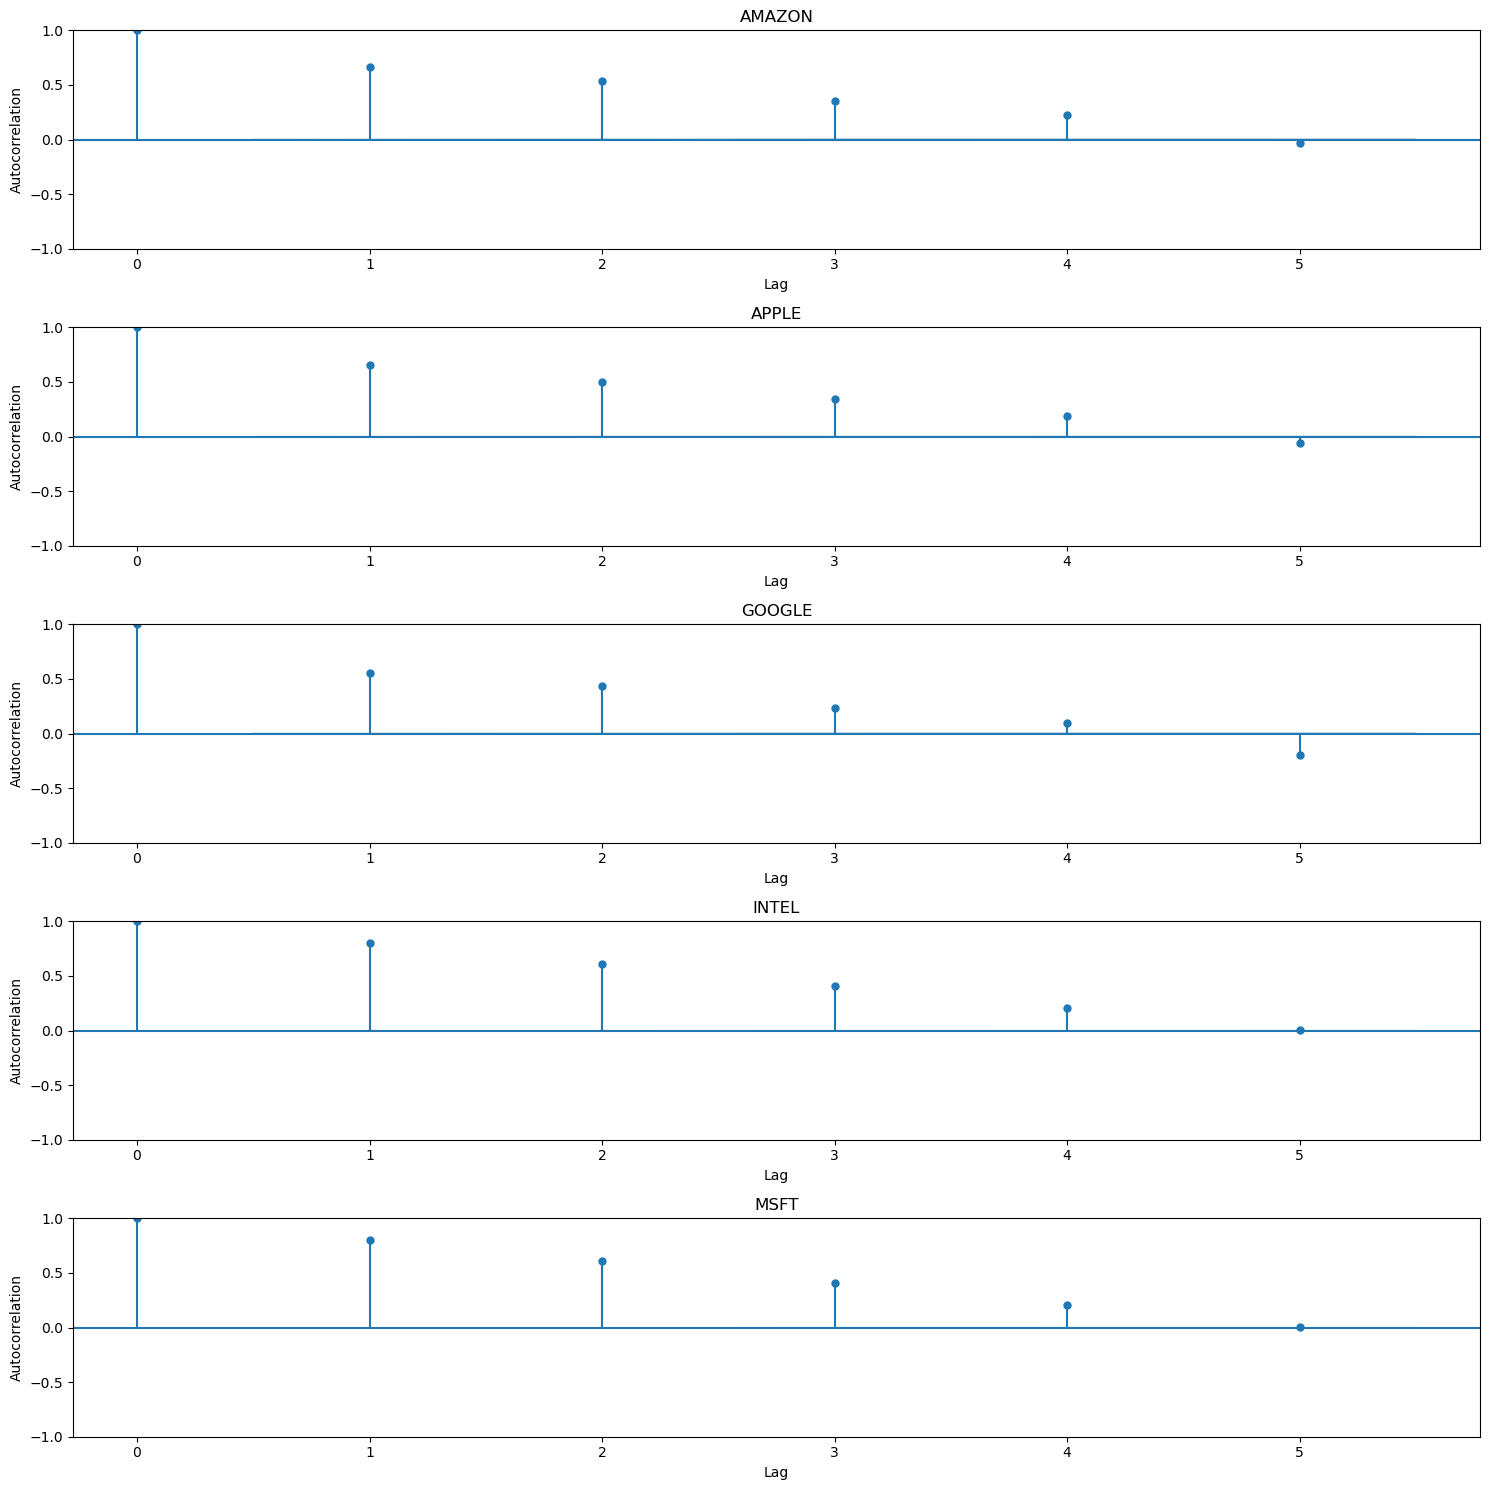

In [116]:
## Plotting the autocorrelation of 5 ticks midprice returns for each stock

fig, axs = plt.subplots(5,1, figsize=(15,15))
for i, (stock, merged_data) in enumerate(merged_data_dict.items()):
    sm.graphics.tsa.plot_acf(merged_data['midprice'].pct_change(5).dropna(), lags=5, ax=axs[i])
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Lag')
    axs[i].set_ylabel('Autocorrelation')
plt.tight_layout()
plt.show()

#### Analyzing 10 ticks returns

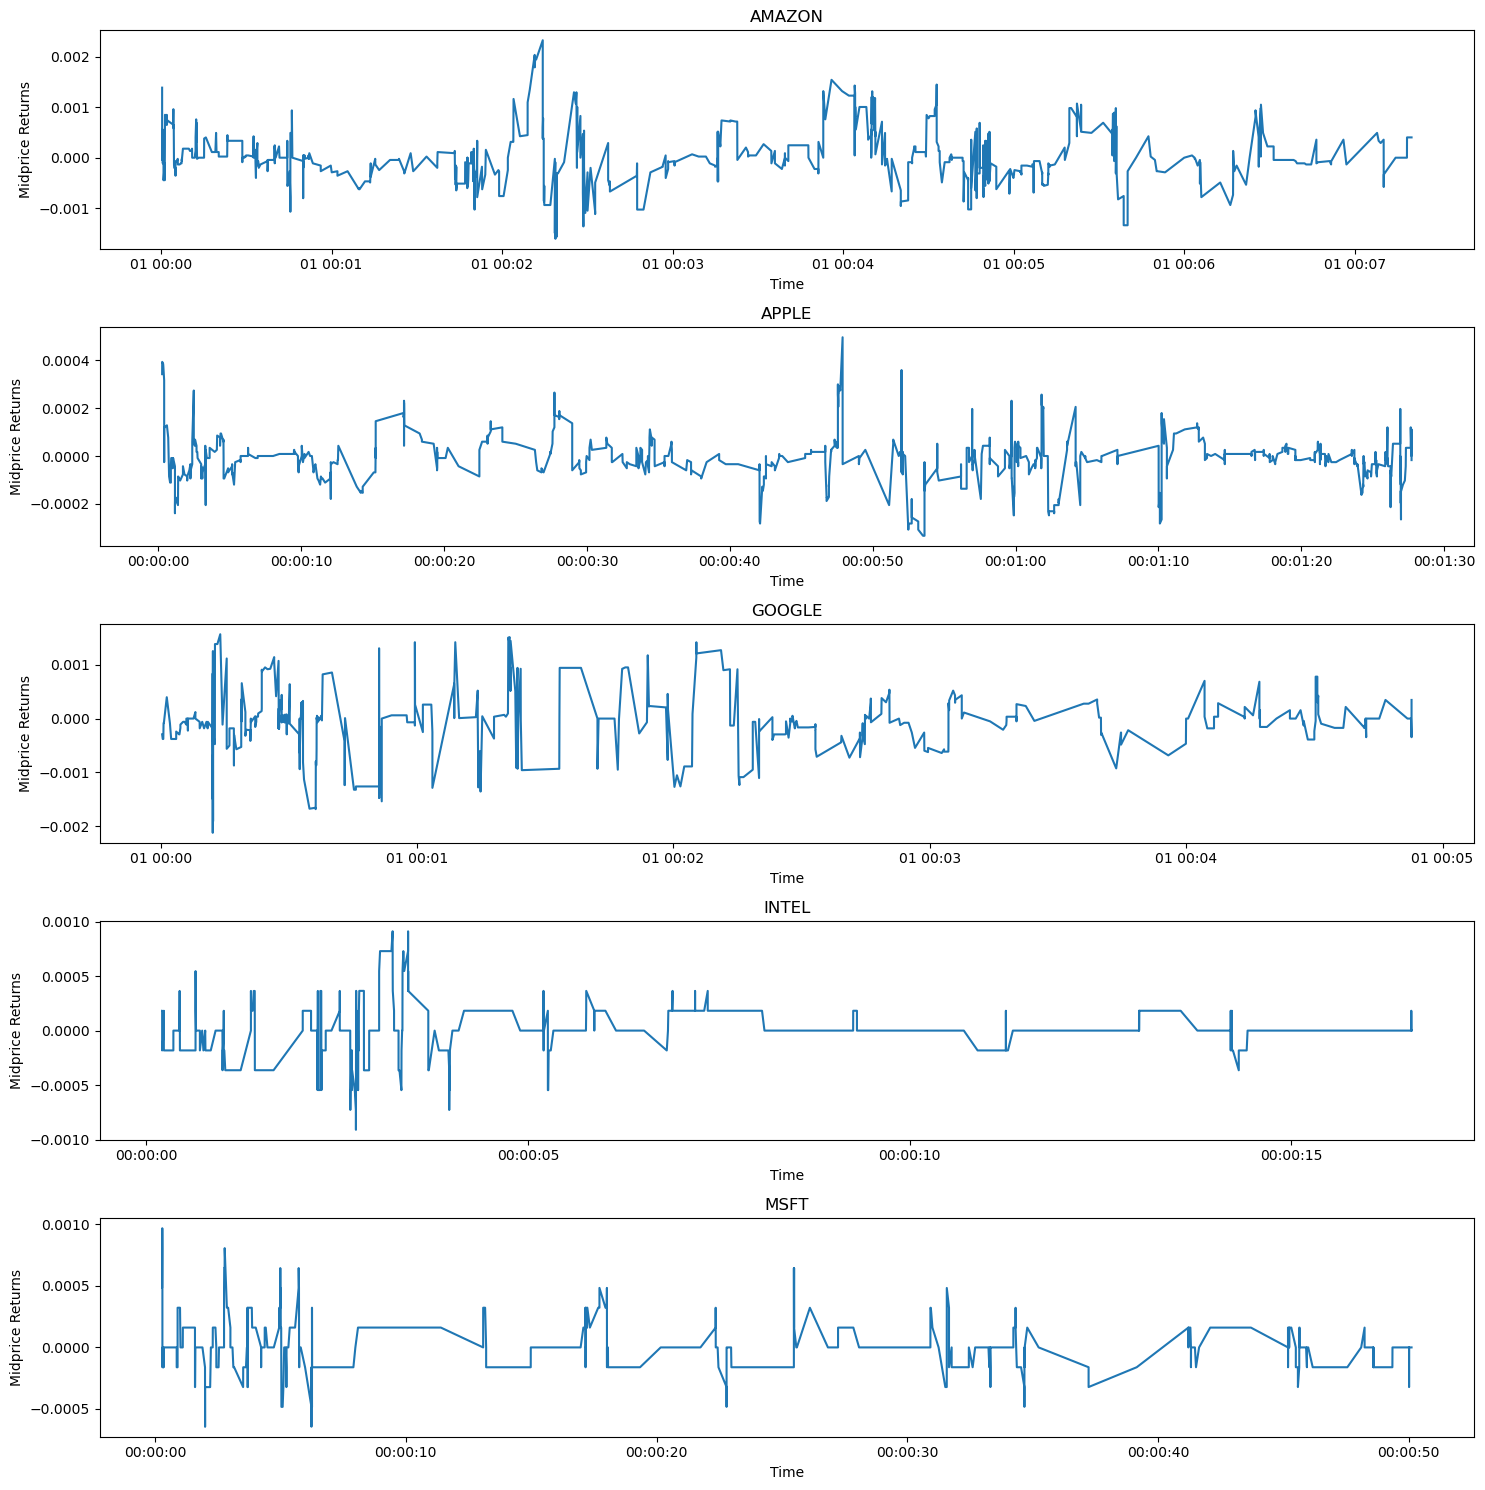

In [106]:
##Plotting ten ticks returns

fig, axs = plt.subplots(5,1, figsize=(15,15))

for i, (stock, merged_data) in enumerate(merged_data_dict.items()):

    sample_to_use = merged_data[:1000]
    axs[i].plot(sample_to_use.index, sample_to_use['midprice'].pct_change(10))
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Midprice Returns')
plt.tight_layout()
plt.show()

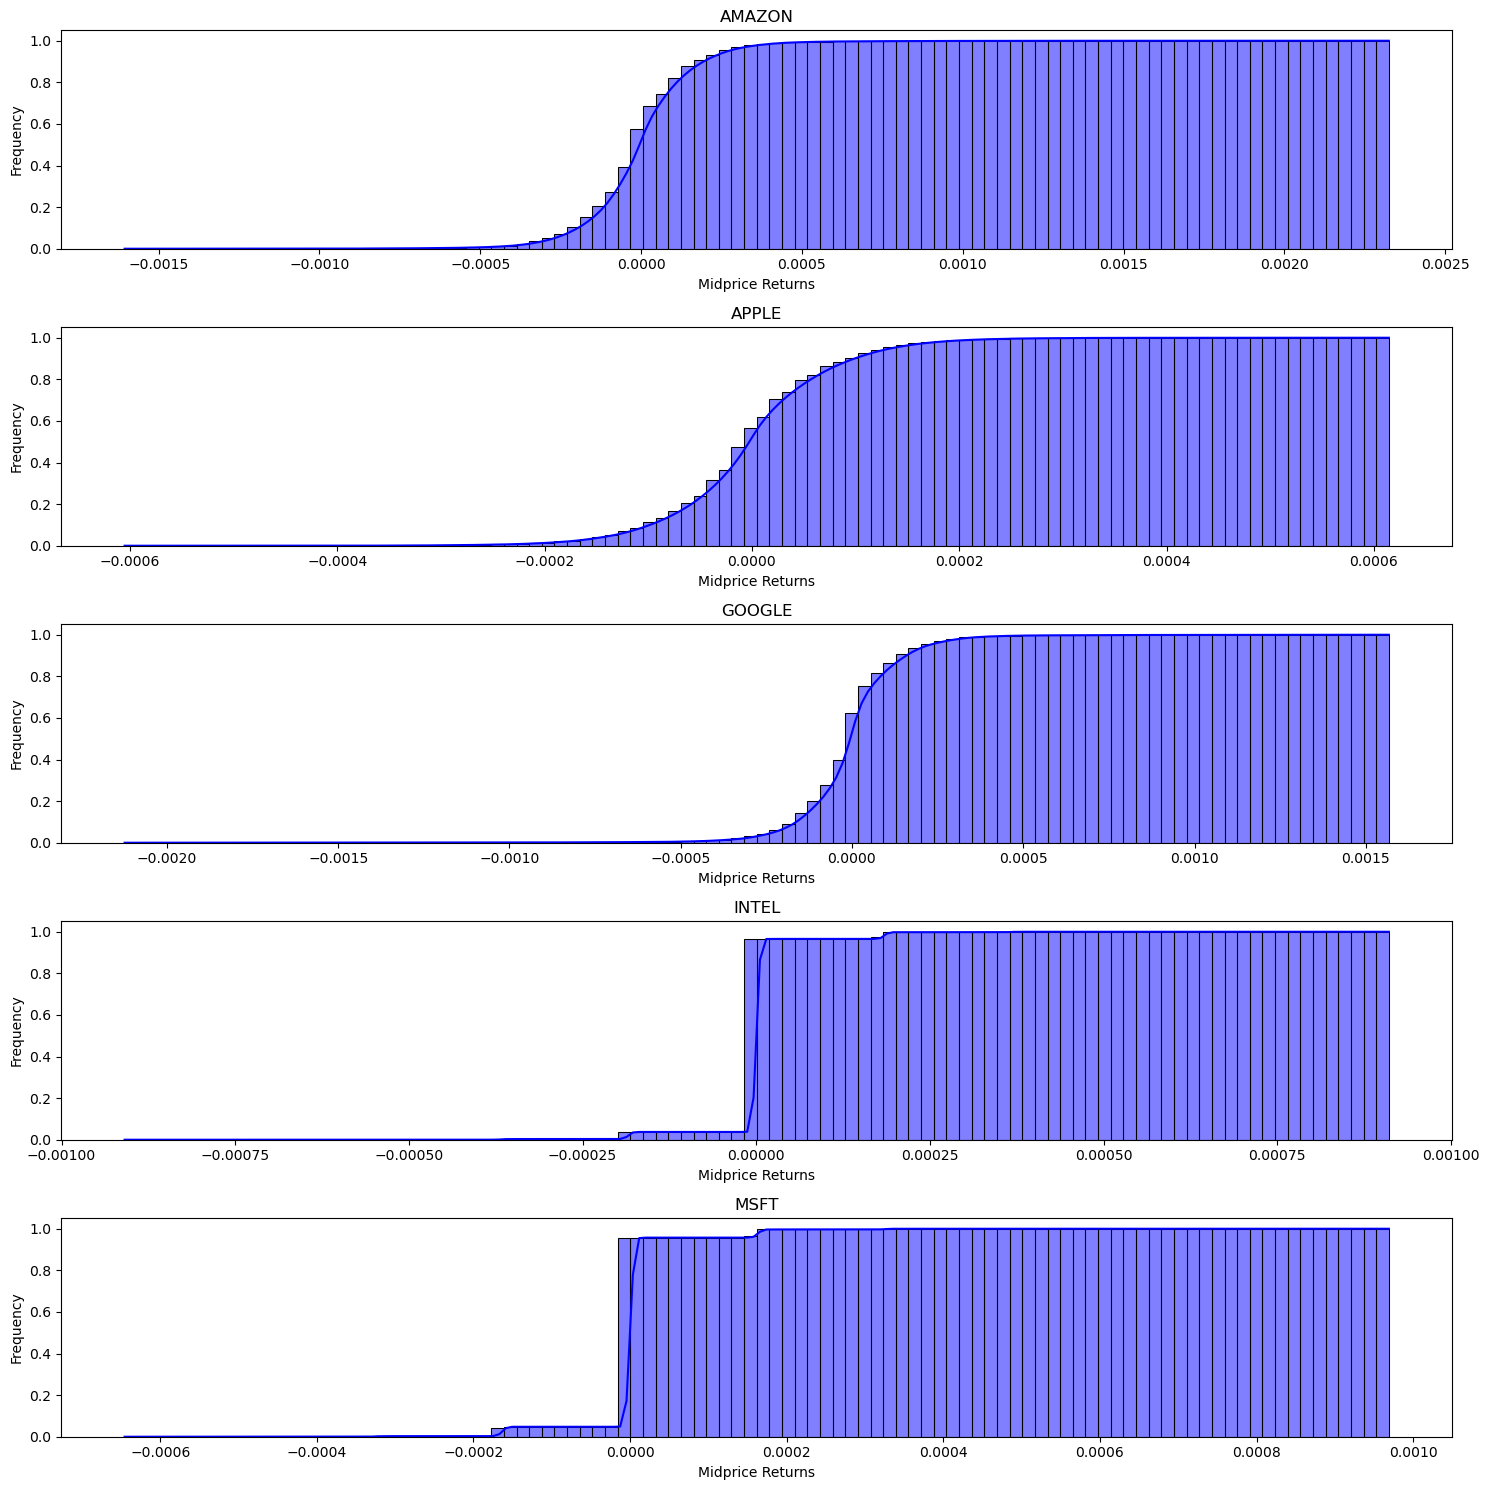

In [118]:
## Plotting returns distribution

fig, axs = plt.subplots(5, 1, figsize = (15,15))

for i, (stock , merged_data) in enumerate(merged_data_dict.items()):
    sns.histplot(merged_data['midprice'].pct_change(10), ax = axs[i], stat = 'density', kde = True, color = 'blue', cumulative =True, bins = 100)
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Midprice Returns')
    axs[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

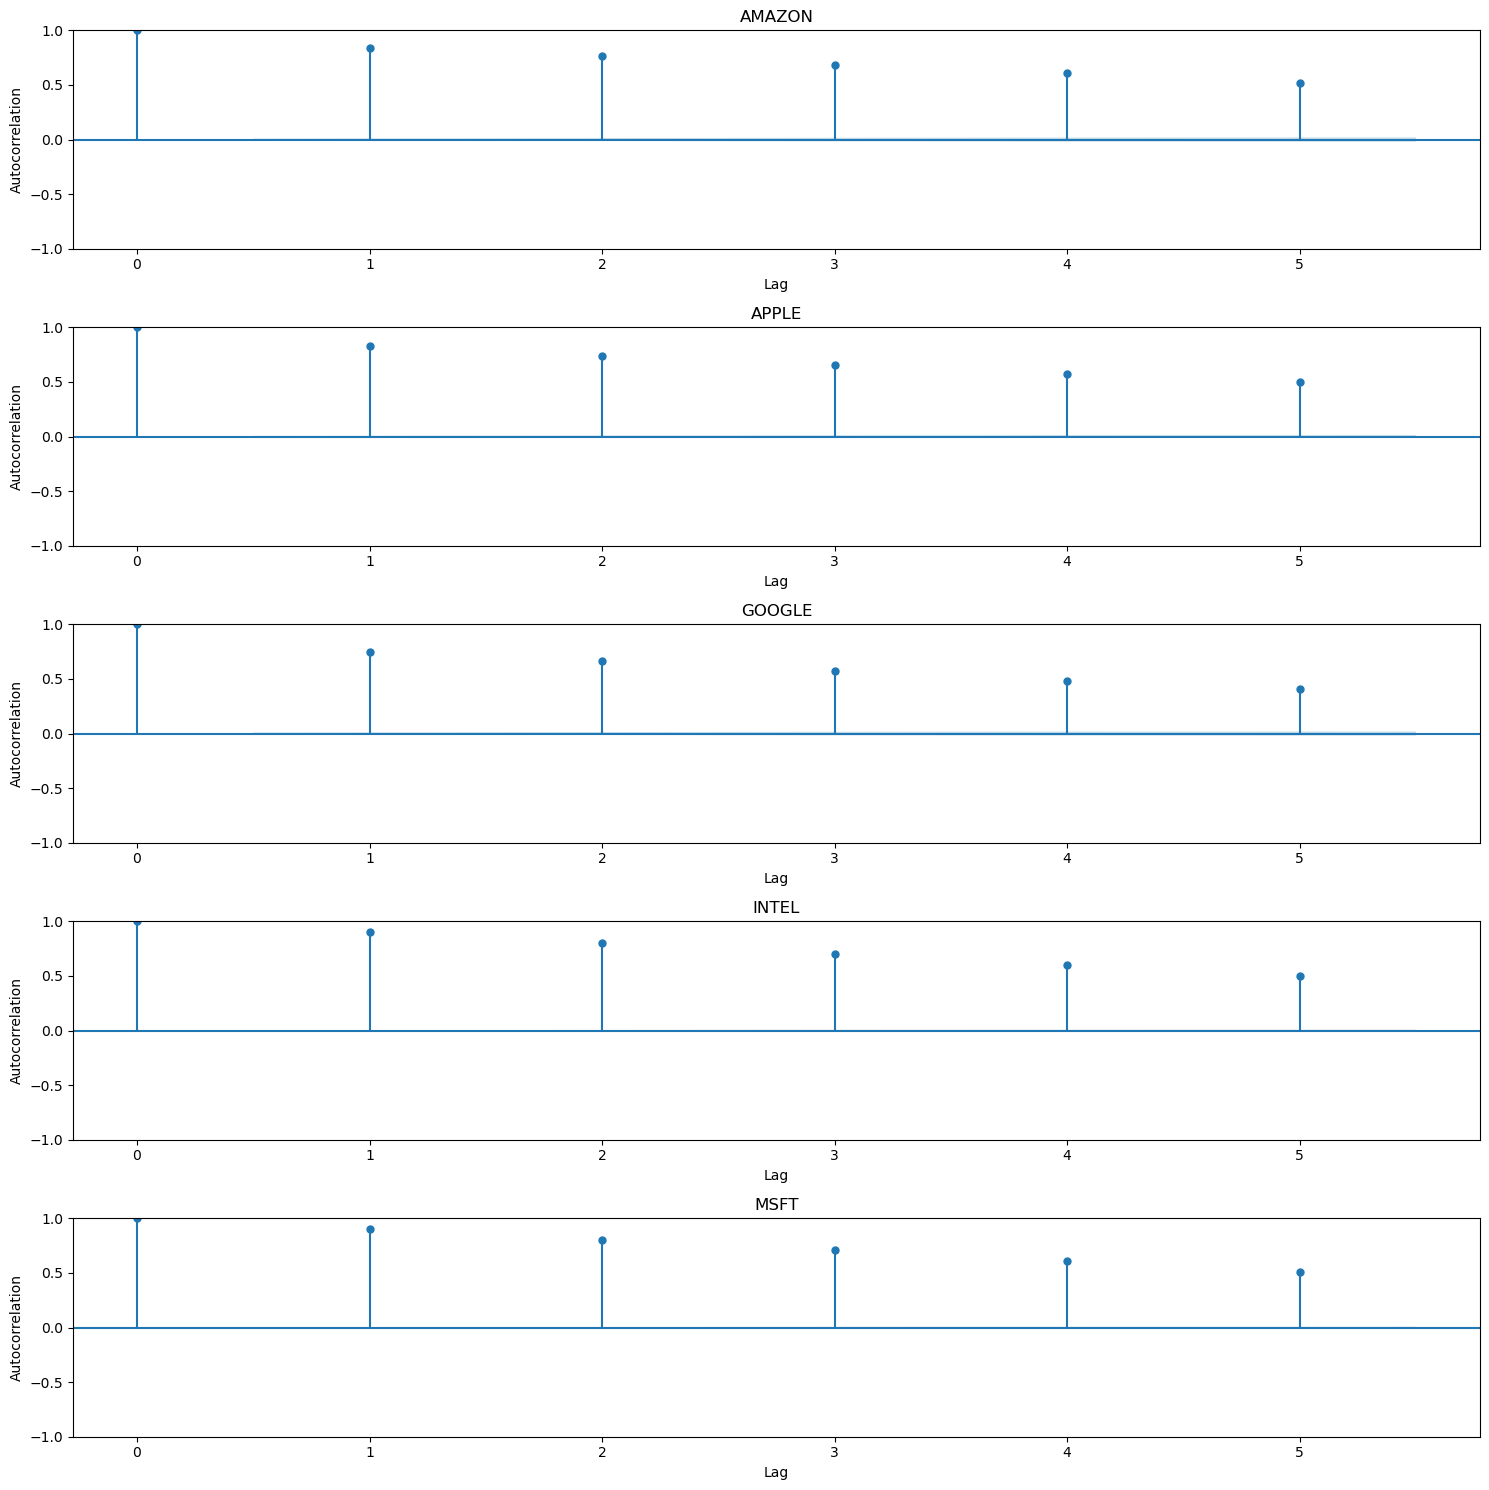

In [117]:
## Plotting the autocorrelation of 5 ticks midprice returns for each stock

fig, axs = plt.subplots(5,1, figsize=(15,15))
for i, (stock, merged_data) in enumerate(merged_data_dict.items()):
    sm.graphics.tsa.plot_acf(merged_data['midprice'].pct_change(10).dropna(), lags=5 , ax=axs[i])
    axs[i].set_title(stock.upper())
    axs[i].set_xlabel('Lag')
    axs[i].set_ylabel('Autocorrelation')
plt.tight_layout()
plt.show()

## f)


We can see that our obsevations do concur with the stylized facts from the "Get-Real" paper. We see that most trades are clustered, with a total absence of significative autocorrelation in 30min returns. We also see that the distribution of returns is leptokurtic, with a fat tail. We also see that the distribution of returns is not normal, and that the distribution of returns is not stationary, as the mean and variance of the returns change over time.

## g)


Clearly, physical time is preferred when looking at long-term price trends and cumulative volumes troughout a day as their sampling frequency allows for aggregation of the data and easier plotting and communication. 
On the other hand, tick time is preferred to look at instantaneous market impact and dynamics, monitoring spreads, layers and order book dynamics.